In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest


In [24]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/eQTL_BYxRM/reference/Saccharomyces_cerevisiae.R64-1-1.81.gff3', skiprows=7, sep='\t', names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])

In [25]:
data

chr   source feature  start      end score strand frame  \
0      chrIV  ensembl    gene   1802   2953.0     .      +     .   
1      chrIV  ensembl    gene   3762   3836.0     .      +     .   
2      chrIV  ensembl    gene   5985   7814.0     .      +     .   
3      chrIV  ensembl    gene   8683   9756.0     .      -     .   
4      chrIV  ensembl    gene  11657  13360.0     .      -     .   
...      ...      ...     ...    ...      ...   ...    ...   ...   
28866   chrM  ensembl     CDS  74495  75622.0     .      +     0   
28867   chrM  ensembl     CDS  75663  75872.0     .      +     0   
28868   chrM  ensembl     CDS  75904  75984.0     .      +     0   
28869   chrM  ensembl     CDS  79213  80022.0     .      +     0   
28870   chrM  ensembl     CDS  85554  85709.0     .      +     0   

                                               attribute  
0      ID=gene:YDL248W;Name=COS7;biotype=protein_codi...  
1      ID=gene:YDL247W-A;biotype=protein_coding;descr...  
2      ID=gene:YDL247W;Name=MPH2;biotype=protein_codi...  
3      ID=gene:YDL246C;Name=SOR2;biotype=protein_codi...  
4      ID=gene:YDL245C;Name=HXT15;biotype=protein_cod...  
...                                                  ...  
28866  ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...  
28867  ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...  
28868  ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...  
28869  ID=CDS:Q0275;Parent=transcript:Q0275;protein_i...  
28870  ID=CDS:Q0297;Parent=transcript:Q0297;protein_i...  

[28871 rows x 9 columns]

In [26]:
gene_info = {}
for index, row in data.iterrows():
    if row['feature'] in ['gene', 'pseudogene']:
        gene = (row['attribute'].split(';')[0].split(':')[1])
        gene_info[gene] = [row['chr'], row['start'], row['end']]

In [27]:
pvalues = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/yeast_pvals.csv', sep='\t', index_col=0)

In [31]:
zscores

YAL062W   YAL061W    YAL060W   YAL059W   YAL058W  \
chrI:33040_A/G    -31.598579 -0.972379  18.969061  0.979111 -1.186941   
chrI:33293_A/T    -31.622916 -0.984084  19.317666  1.125721 -1.007720   
chrI:34170_T/A    -31.511386 -0.885873  19.380271  1.078838 -1.051350   
chrI:34308_C/T    -31.217146 -0.853426  19.762337  1.199822 -1.004158   
chrI:34554_A/G    -30.970802 -0.775722  20.208265  1.082412 -0.859863   
...                      ...       ...        ...       ...       ...   
chrXVI:925172_C/G  -1.878288  1.656646   1.765346  0.078942  0.514008   
chrXVI:925497_A/C  -1.789710  1.689125   1.781295  0.019399  0.510535   
chrXVI:925746_T/A  -1.876742  1.517999   1.835628 -0.022717  0.477998   
chrXVI:927980_A/G  -1.756390  1.613718   1.929130 -0.150859  0.597739   
chrXVI:928107_C/T  -1.932257  1.432247   2.099137 -0.194546  0.446618   

                     YAL056W   YAL055W    YAL054C   YAL053W   YAL051W  ...  \
chrI:33040_A/G    -31.004637 -8.123816 -11.391039 -2.453455 -0.647279  ...   
chrI:33293_A/T    -31.539507 -8.360404 -11.599305 -2.693453 -0.744684  ...   
chrI:34170_T/A    -31.673859 -8.351817 -11.548686 -2.676125 -0.751790  ...   
chrI:34308_C/T    -32.243206 -8.612855 -11.525665 -2.668514 -0.700326  ...   
chrI:34554_A/G    -32.553584 -8.697921 -11.592931 -2.473533 -0.646193  ...   
...                      ...       ...        ...       ...       ...  ...   
chrXVI:925172_C/G   0.155787 -0.136514   1.802870 -0.454363  0.310212  ...   
chrXVI:925497_A/C   0.099865 -0.097645   1.795782 -0.433946  0.282035  ...   
chrXVI:925746_T/A   0.044040 -0.169780   1.634112 -0.490999  0.251663  ...   
chrXVI:927980_A/G   0.275670 -0.007228   1.832706 -0.366203  0.554485  ...   
chrXVI:928107_C/T   0.155701 -0.181337   1.728195 -0.359879  0.629918  ...   

                     YPR194C   YPR196W   YPR198W   YPR199C    YPR200C  \
chrI:33040_A/G      2.148648 -0.195722 -0.016357  1.399266  -0.344609   
chrI:33293_A/T      2.224936 -0.501589 -0.153324  1.289595  -0.386804   
chrI:34170_T/A      2.192915 -0.476664 -0.101812  1.326720  -0.308631   
chrI:34308_C/T      1.969360 -0.306733 -0.031491  1.394985  -0.229060   
chrI:34554_A/G      2.107095 -0.390783  0.242107  1.661360  -0.179508   
...                      ...       ...       ...       ...        ...   
chrXVI:925172_C/G  20.650455 -5.819924  1.783867 -1.959426 -18.699526   
chrXVI:925497_A/C  20.677838 -5.790738  1.738267 -2.021244 -18.692003   
chrXVI:925746_T/A  20.716429 -5.802717  1.826944 -2.008670 -18.728739   
chrXVI:927980_A/G  21.052546 -5.561080  1.699271 -2.306076 -19.316015   
chrXVI:928107_C/T  21.159144 -5.425300  1.662000 -2.298656 -19.454591   

                     YPR202W    YPR203W    YPR204W     Q0130     Q0140  
chrI:33040_A/G     -0.526027  -0.255646  -0.810013 -0.530052  1.000394  
chrI:33293_A/T     -0.740686  -0.427971  -0.860122 -0.651815  1.042772  
chrI:34170_T/A     -0.757939  -0.443332  -0.869619 -0.648872  0.945447  
chrI:34308_C/T     -0.685074  -0.543311  -0.764805 -0.966962  0.955611  
chrI:34554_A/G     -0.678642  -0.497393  -0.766558 -0.992528  0.757448  
...                      ...        ...        ...       ...       ...  
chrXVI:925172_C/G -17.405282 -17.440643 -20.267768  1.790716 -0.652096  
chrXVI:925497_A/C -17.397571 -17.531723 -20.341962  1.861398 -0.668779  
chrXVI:925746_T/A -17.396632 -17.484141 -20.439892  1.802389 -0.671755  
chrXVI:927980_A/G -17.630722 -17.972464 -21.250677  1.857161 -0.746218  
chrXVI:928107_C/T -17.666149 -18.134631 -21.355735  1.726754 -0.621191  

[11530 rows x 5720 columns]

In [28]:
col_coord = [f'{gene_info[col][0]}:{gene_info[col][1]}' for col in pvalues.columns]
pvalues.columns = col_coord
# remove chrM
pvalues = pvalues[pvalues.columns[:-2]]

In [19]:
zscores

chrI:31567  chrI:33448  chrI:35155  chrI:36509  chrI:37464  \
chrI:33040_A/G     -31.598579   -0.972379   18.969061    0.979111   -1.186941   
chrI:33293_A/T     -31.622916   -0.984084   19.317666    1.125721   -1.007720   
chrI:34170_T/A     -31.511386   -0.885873   19.380271    1.078838   -1.051350   
chrI:34308_C/T     -31.217146   -0.853426   19.762337    1.199822   -1.004158   
chrI:34554_A/G     -30.970802   -0.775722   20.208265    1.082412   -0.859863   
...                       ...         ...         ...         ...         ...   
chrXVI:925172_C/G   -1.878288    1.656646    1.765346    0.078942    0.514008   
chrXVI:925497_A/C   -1.789710    1.689125    1.781295    0.019399    0.510535   
chrXVI:925746_T/A   -1.876742    1.517999    1.835628   -0.022717    0.477998   
chrXVI:927980_A/G   -1.756390    1.613718    1.929130   -0.150859    0.597739   
chrXVI:928107_C/T   -1.932257    1.432247    2.099137   -0.194546    0.446618   

                   chrI:39259  chrI:42177  chrI:42881  chrI:45899  chrI:48564  \
chrI:33040_A/G     -31.004637   -8.123816  -11.391039   -2.453455   -0.647279   
chrI:33293_A/T     -31.539507   -8.360404  -11.599305   -2.693453   -0.744684   
chrI:34170_T/A     -31.673859   -8.351817  -11.548686   -2.676125   -0.751790   
chrI:34308_C/T     -32.243206   -8.612855  -11.525665   -2.668514   -0.700326   
chrI:34554_A/G     -32.553584   -8.697921  -11.592931   -2.473533   -0.646193   
...                       ...         ...         ...         ...         ...   
chrXVI:925172_C/G    0.155787   -0.136514    1.802870   -0.454363    0.310212   
chrXVI:925497_A/C    0.099865   -0.097645    1.795782   -0.433946    0.282035   
chrXVI:925746_T/A    0.044040   -0.169780    1.634112   -0.490999    0.251663   
chrXVI:927980_A/G    0.275670   -0.007228    1.832706   -0.366203    0.554485   
chrXVI:928107_C/T    0.155701   -0.181337    1.728195   -0.359879    0.629918   

                   ...  chrXVI:921860  chrXVI:922909  chrXVI:924304  \
chrI:33040_A/G     ...      -0.055831      -1.137253       2.148648   
chrI:33293_A/T     ...      -0.106657      -1.307330       2.224936   
chrI:34170_T/A     ...      -0.090035      -1.276223       2.192915   
chrI:34308_C/T     ...      -0.047494      -1.262350       1.969360   
chrI:34554_A/G     ...      -0.067610      -1.269184       2.107095   
...                ...            ...            ...            ...   
chrXVI:925172_C/G  ...      27.745135      21.698403      20.650455   
chrXVI:925497_A/C  ...      27.757131      21.677167      20.677838   
chrXVI:925746_T/A  ...      27.498510      21.437862      20.716429   
chrXVI:927980_A/G  ...      26.340928      20.952275      21.052546   
chrXVI:928107_C/T  ...      25.943817      20.622360      21.159144   

                   chrXVI:931376  chrXVI:934034  chrXVI:938148  chrXVI:939279  \
chrI:33040_A/G         -0.195722      -0.016357       1.399266      -0.344609   
chrI:33293_A/T         -0.501589      -0.153324       1.289595      -0.386804   
chrI:34170_T/A         -0.476664      -0.101812       1.326720      -0.308631   
chrI:34308_C/T         -0.306733      -0.031491       1.394985      -0.229060   
chrI:34554_A/G         -0.390783       0.242107       1.661360      -0.179508   
...                          ...            ...            ...            ...   
chrXVI:925172_C/G      -5.819924       1.783867      -1.959426     -18.699526   
chrXVI:925497_A/C      -5.790738       1.738267      -2.021244     -18.692003   
chrXVI:925746_T/A      -5.802717       1.826944      -2.008670     -18.728739   
chrXVI:927980_A/G      -5.561080       1.699271      -2.306076     -19.316015   
chrXVI:928107_C/T      -5.425300       1.662000      -2.298656     -19.454591   

                   chrXVI:943032  chrXVI:943880  chrXVI:944603  
chrI:33040_A/G         -0.526027      -0.255646      -0.810013  
chrI:33293_A/T         -0.740686      -0.427971      -0.860122  
chrI:34170_T/A         -0.757939      -0.443332     

In [101]:
zscores = ''

In [29]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in pvalues.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [86]:
chr_start

{'chrI': 0,
 'chrII': 202925,
 'chrIII': 1001807,
 'chrIV': 1304886,
 'chrV': 2826355,
 'chrVI': 3390284,
 'chrVII': 3656529,
 'chrVIII': 4724890,
 'chrIX': 5244209,
 'chrX': 5669175,
 'chrXI': 6393531,
 'chrXII': 7037293,
 'chrXIII': 8096000,
 'chrXIV': 9010675,
 'chrXV': 9776105,
 'chrXVI': 10843725}

In [30]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

In [31]:
labels

['chrI',
 'chrII',
 'chrIII',
 'chrIV',
 'chrV',
 'chrVI',
 'chrVII',
 'chrVIII',
 'chrIX',
 'chrX',
 'chrXI',
 'chrXII',
 'chrXIII',
 'chrXIV',
 'chrXV',
 'chrXVI']

In [32]:
labels_pos

[5000,
 207925,
 1006807,
 1309886,
 2831355,
 3395284,
 3661529,
 4729890,
 5249209,
 5674175,
 6398531,
 7042293,
 8101000,
 9015675,
 9781105,
 10848725]

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'gene position (chromosome)')

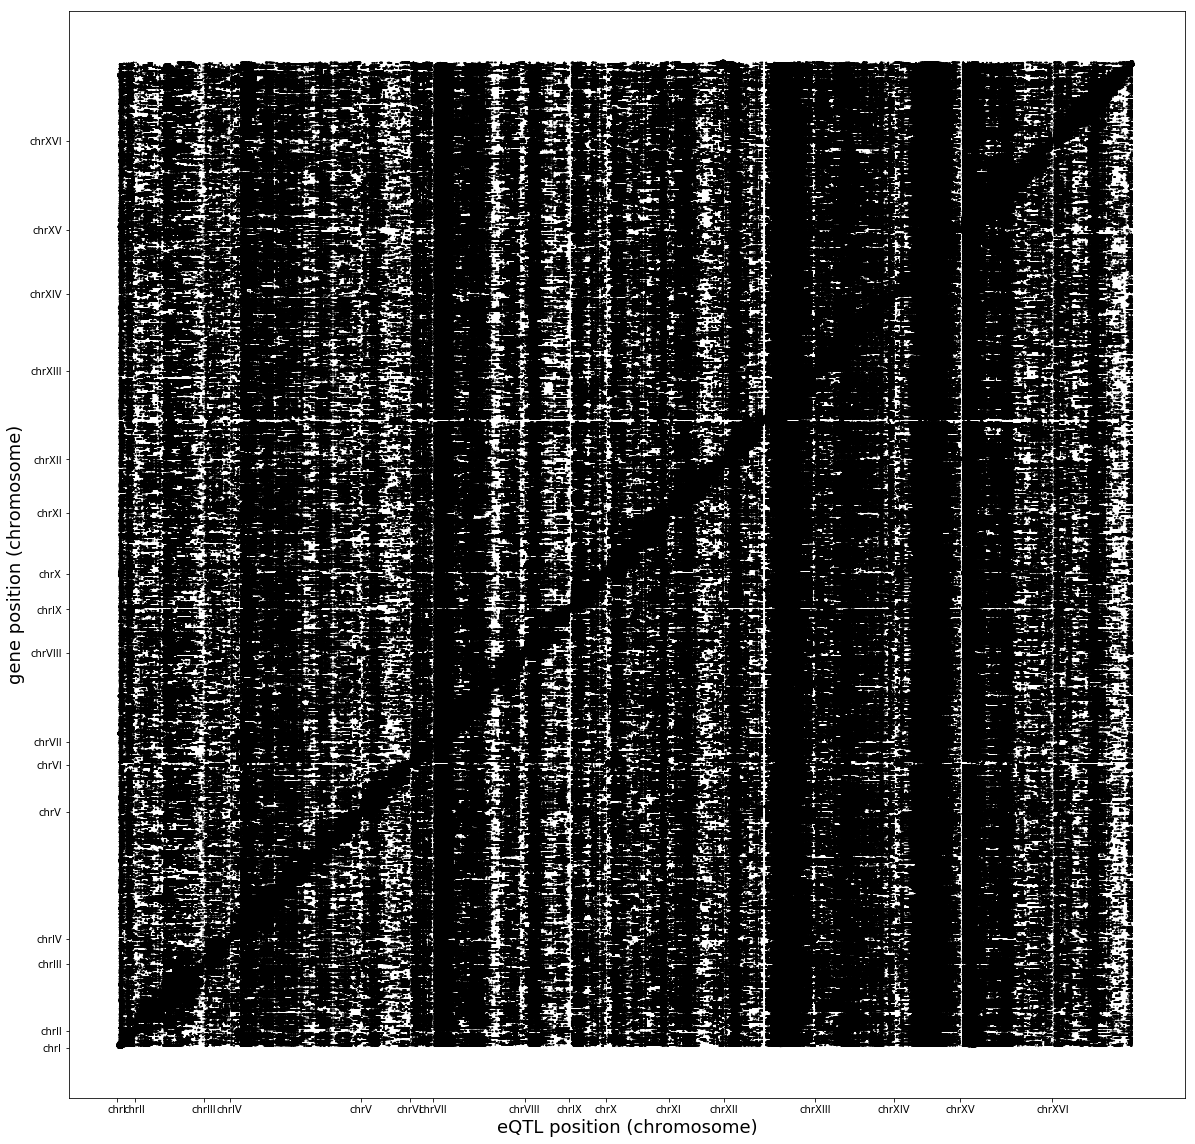

In [77]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('gene position (chromosome)', fontsize=18)

In [33]:
pval_flat = np.array(pvalues).flatten()

In [84]:
pval_flat

array([3.86175288e-219, 3.30862151e-001, 3.07346955e-080, ...,
       7.64396900e-070, 1.69836404e-073, 3.44901903e-101])

In [35]:
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')


In [36]:
pvals_adj[1]

array([5.46763752e-215, 6.71487334e-001, 5.75084620e-077, ...,
       1.13516611e-066, 2.74922935e-070, 9.73106524e-098])

In [90]:
pvals_adj[1]

array([5.46763752e-215, 6.71487334e-001, 5.75084620e-077, ...,
       1.13516611e-066, 2.74922935e-070, 9.73106524e-098])

In [91]:
pvalues.shape

(11530, 5726)

In [38]:
pvalues_adjusted = pvals_adj[1].reshape((11530, 5726))

In [39]:
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=pvalues.columns, index=pvalues.index)

In [42]:
pvalues_adj_df

chrI:31567  chrI:33448    chrI:35155  chrI:36509  \
chrI:33040_A/G     5.467638e-215    0.671487  5.750846e-77    0.668617   
chrI:33293_A/T     2.537392e-215    0.666517  7.578434e-80    0.605333   
chrI:34170_T/A     8.473912e-214    0.707851  2.274534e-80    0.625775   
chrI:34308_C/T     8.386618e-210    0.721223  1.348731e-83    0.572856   
chrI:34554_A/G     1.738702e-206    0.752672  1.924675e-87    0.624216   
...                          ...         ...           ...         ...   
chrXVI:925172_C/G   2.886628e-01    0.375588  3.318140e-01    0.981359   
chrXVI:925497_A/C   3.222767e-01    0.362314  3.255596e-01    0.995572   
chrXVI:925746_T/A   2.892334e-01    0.433962  3.046374e-01    0.994807   
chrXVI:927980_A/G   3.353405e-01    0.393388  2.701540e-01    0.962999   
chrXVI:928107_C/T   2.690366e-01    0.470926  2.127363e-01    0.951204   

                   chrI:37464     chrI:39259    chrI:42177    chrI:42881  \
chrI:33040_A/G       0.578518  6.112411e-207  6.931062e-14  1.820263e-27   
chrI:33293_A/T       0.656431  3.500647e-214  1.035916e-14  1.717765e-28   
chrI:34170_T/A       0.637652  5.090715e-216  1.110933e-14  3.061334e-28   
chrI:34308_C/T       0.657956  6.819238e-224  1.279049e-15  3.977457e-28   
chrI:34554_A/G       0.718585  3.045326e-228  6.232491e-16  1.847649e-28   
...                       ...            ...           ...           ...   
chrXVI:925172_C/G    0.850856   9.616929e-01  9.667749e-01  3.171714e-01   
chrXVI:925497_A/C    0.852065   9.761515e-01  9.767135e-01  3.199167e-01   
chrXVI:925746_T/A    0.863301   9.898093e-01  9.579484e-01  3.849011e-01   
chrXVI:927980_A/G    0.820913   9.279737e-01  9.983606e-01  3.057510e-01   
chrXVI:928107_C/T    0.873924   9.617156e-01  9.548221e-01  3.465451e-01   

                   chrI:45899  chrI:48564  ...  chrXVI:921860  chrXVI:922909  \
chrI:33040_A/G       0.117680    0.802500  ...   9.869895e-01   6.002873e-01   
chrI:33293_A/T       0.072813    0.764986  ...   9.744377e-01   5.256006e-01   
chrI:34170_T/A       0.075550    0.762176  ...   9.786149e-01   5.392780e-01   
chrI:34308_C/T       0.076776    0.782267  ...   9.889837e-01   5.453788e-01   
chrI:34554_A/G       0.113328    0.802912  ...   9.841288e-01   5.423788e-01   
...                       ...         ...  ...            ...            ...   
chrXVI:925172_C/G    0.871328    0.917603  ...  1.643446e-165  6.371500e-101   
chrXVI:925497_A/C    0.878160    0.926081  ...  1.180245e-165  1.007006e-100   
chrXVI:925746_T/A    0.858852    0.935028  ...  1.450074e-162   1.698671e-98   
chrXVI:927980_A/G    0.900199    0.836567  ...  4.277428e-149   4.716523e-94   
chrXVI:928107_C/T    0.902203    0.808995  ...  1.313527e-144   4.317998e-91   

                   chrXVI:924304  chrXVI:931376  chrXVI:934034  chrXVI:938148  \
chrI:33040_A/G      1.974096e-01   9.508726e-01       0.996269       0.485295   
chrI:33293_A/T      1.750685e-01   8.551876e-01       0.962344       0.533402   
chrI:34170_T/A      1.842382e-01   8.637579e-01       0.975659       0.517088   
chrI:34308_C/T      2.559300e-01   9.186560e-01       0.992765       0.487168   
chrI:34554_A/G      2.102160e-01   8.923312e-01       0.937783       0.373645   
...                          ...            ...            ...            ...   
chrXVI:925172_C/G   2.426194e-91   3.827822e-07       0.324557       0.259404   
chrXVI:925497_A/C   1.382574e-91   4.500527e-07       0.342530       0.238164   
chrXVI:925746_T/A   6.247188e-92   4.212158e-07       0.307941       0.242410   
chrXVI:927980_A/G   5.803824e-95   1.557810e-06       0.358199       0.153029   
chrXVI:928107_C/T   6.194176e-96   3.162871e-06       0.373382       0.154967   

                   chrXVI:939279  chrXVI:943032  chrXVI:943880  chrXVI:944603  
chrI:33040_A/G      9.070006e-01   8.466472e-01   9.338694e-01   7.389092e-01  
chrI:33293_A/T      8.936173e-01   7.665621e-01   8.801587e-01   7.184800e-01  
chrI:34170_T/A      9.180812e-01   7.597520e-0

In [98]:
pvalues_adj_df

chrI:31567  chrI:33448    chrI:35155  chrI:36509  \
chrI:33040_A/G     5.467638e-215    0.671487  5.750846e-77    0.668617   
chrI:33293_A/T     2.537392e-215    0.666517  7.578434e-80    0.605333   
chrI:34170_T/A     8.473912e-214    0.707851  2.274534e-80    0.625775   
chrI:34308_C/T     8.386618e-210    0.721223  1.348731e-83    0.572856   
chrI:34554_A/G     1.738702e-206    0.752672  1.924675e-87    0.624216   
...                          ...         ...           ...         ...   
chrXVI:925172_C/G   2.886628e-01    0.375588  3.318140e-01    0.981359   
chrXVI:925497_A/C   3.222767e-01    0.362314  3.255596e-01    0.995572   
chrXVI:925746_T/A   2.892334e-01    0.433962  3.046374e-01    0.994807   
chrXVI:927980_A/G   3.353405e-01    0.393388  2.701540e-01    0.962999   
chrXVI:928107_C/T   2.690366e-01    0.470926  2.127363e-01    0.951204   

                   chrI:37464     chrI:39259    chrI:42177    chrI:42881  \
chrI:33040_A/G       0.578518  6.112411e-207  6.931062e-14  1.820263e-27   
chrI:33293_A/T       0.656431  3.500647e-214  1.035916e-14  1.717765e-28   
chrI:34170_T/A       0.637652  5.090715e-216  1.110933e-14  3.061334e-28   
chrI:34308_C/T       0.657956  6.819238e-224  1.279049e-15  3.977457e-28   
chrI:34554_A/G       0.718585  3.045326e-228  6.232491e-16  1.847649e-28   
...                       ...            ...           ...           ...   
chrXVI:925172_C/G    0.850856   9.616929e-01  9.667749e-01  3.171714e-01   
chrXVI:925497_A/C    0.852065   9.761515e-01  9.767135e-01  3.199167e-01   
chrXVI:925746_T/A    0.863301   9.898093e-01  9.579484e-01  3.849011e-01   
chrXVI:927980_A/G    0.820913   9.279737e-01  9.983606e-01  3.057510e-01   
chrXVI:928107_C/T    0.873924   9.617156e-01  9.548221e-01  3.465451e-01   

                   chrI:45899  chrI:48564  ...  chrXVI:921860  chrXVI:922909  \
chrI:33040_A/G       0.117680    0.802500  ...   9.869895e-01   6.002873e-01   
chrI:33293_A/T       0.072813    0.764986  ...   9.744377e-01   5.256006e-01   
chrI:34170_T/A       0.075550    0.762176  ...   9.786149e-01   5.392780e-01   
chrI:34308_C/T       0.076776    0.782267  ...   9.889837e-01   5.453788e-01   
chrI:34554_A/G       0.113328    0.802912  ...   9.841288e-01   5.423788e-01   
...                       ...         ...  ...            ...            ...   
chrXVI:925172_C/G    0.871328    0.917603  ...  1.643446e-165  6.371500e-101   
chrXVI:925497_A/C    0.878160    0.926081  ...  1.180245e-165  1.007006e-100   
chrXVI:925746_T/A    0.858852    0.935028  ...  1.450074e-162   1.698671e-98   
chrXVI:927980_A/G    0.900199    0.836567  ...  4.277428e-149   4.716523e-94   
chrXVI:928107_C/T    0.902203    0.808995  ...  1.313527e-144   4.317998e-91   

                   chrXVI:924304  chrXVI:931376  chrXVI:934034  chrXVI:938148  \
chrI:33040_A/G      1.974096e-01   9.508726e-01       0.996269       0.485295   
chrI:33293_A/T      1.750685e-01   8.551876e-01       0.962344       0.533402   
chrI:34170_T/A      1.842382e-01   8.637579e-01       0.975659       0.517088   
chrI:34308_C/T      2.559300e-01   9.186560e-01       0.992765       0.487168   
chrI:34554_A/G      2.102160e-01   8.923312e-01       0.937783       0.373645   
...                          ...            ...            ...            ...   
chrXVI:925172_C/G   2.426194e-91   3.827822e-07       0.324557       0.259404   
chrXVI:925497_A/C   1.382574e-91   4.500527e-07       0.342530       0.238164   
chrXVI:925746_T/A   6.247188e-92   4.212158e-07       0.307941       0.242410   
chrXVI:927980_A/G   5.803824e-95   1.557810e-06       0.358199       0.153029   
chrXVI:928107_C/T   6.194176e-96   3.162871e-06       0.373382       0.154967   

                   chrXVI:939279  chrXVI:943032  chrXVI:943880  chrXVI:944603  
chrI:33040_A/G      9.070006e-01   8.466472e-01   9.338694e-01   7.389092e-01  
chrI:33293_A/T      8.936173e-01   7.665621e-01   8.801587e-01   7.184800e-01  
chrI:34170_T/A      9.180812e-01   7.597520e-0

In [ ]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('gene position (chromosome)', fontsize=18)

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'gene position (chromosome)')

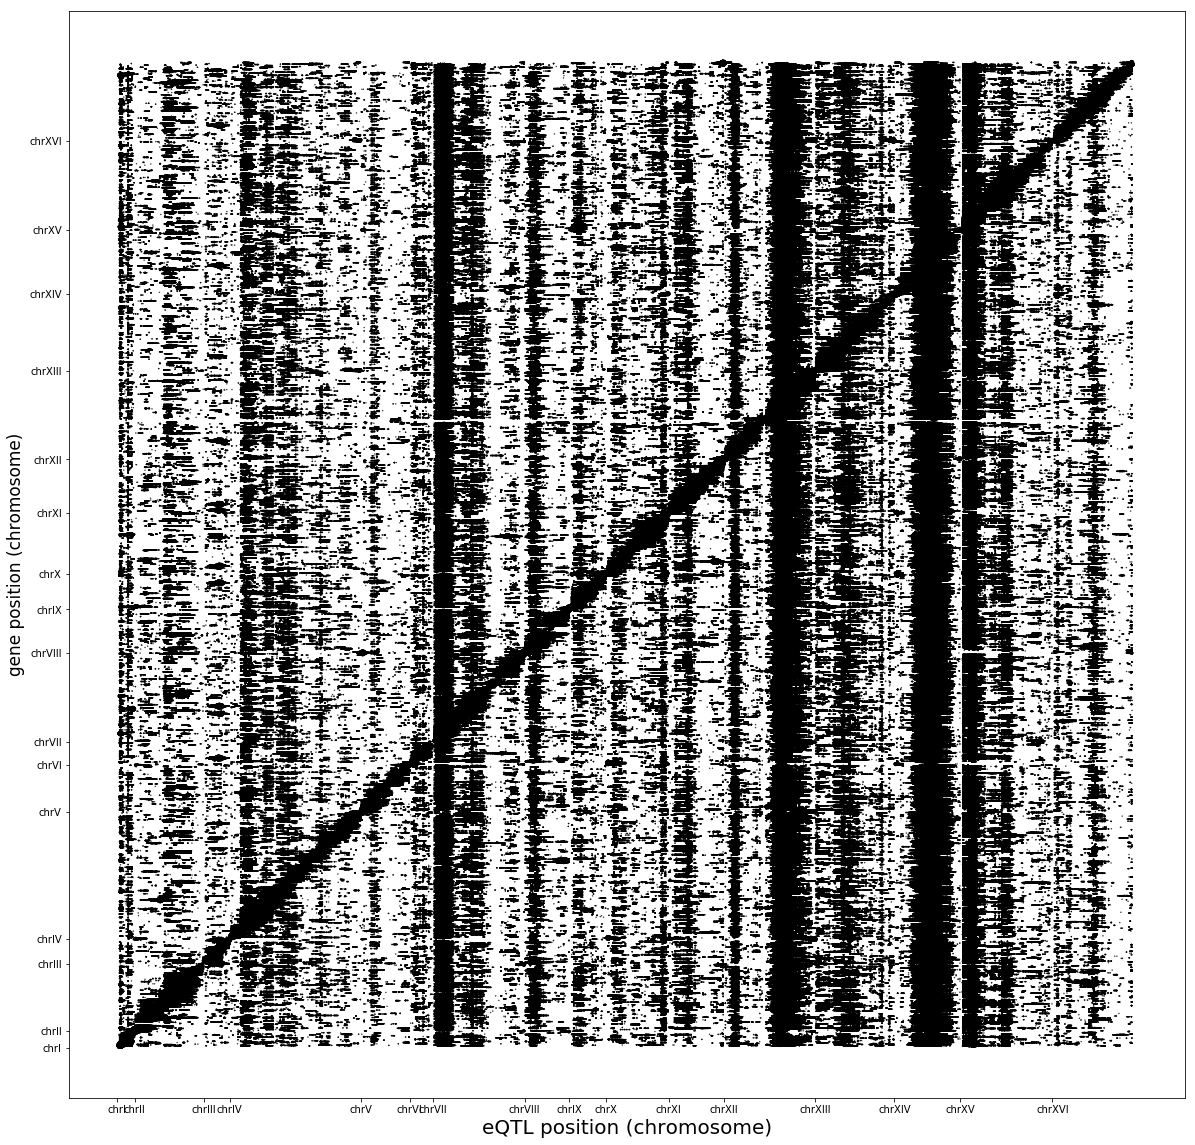

In [44]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=20)
plt.ylabel('gene position (chromosome)', fontsize=17)

In [46]:
plt.show()

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


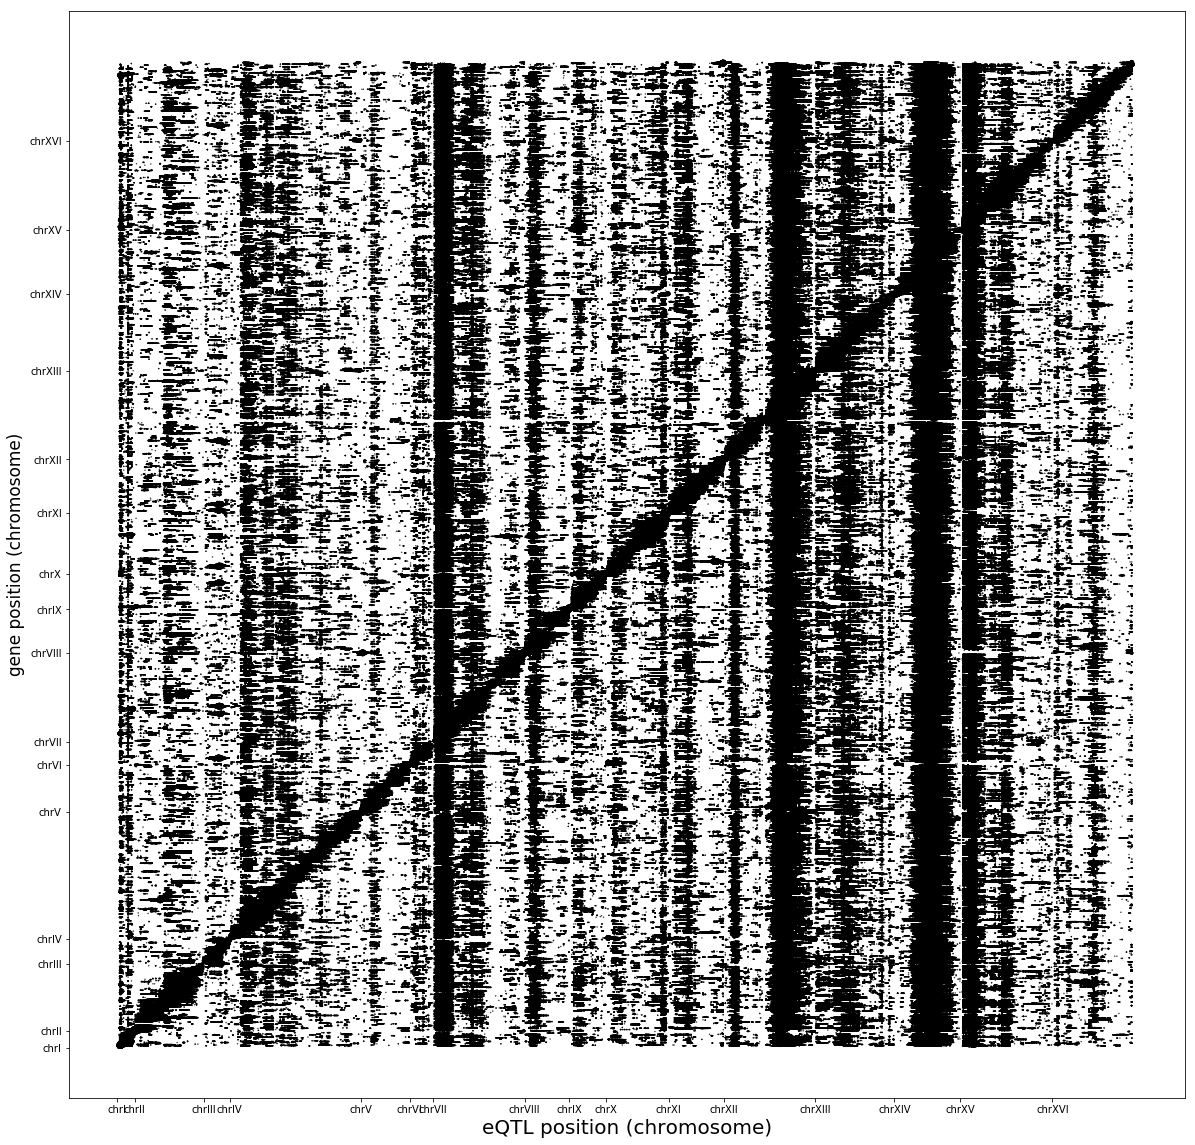

In [47]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=20)
plt.ylabel('gene position (chromosome)', fontsize=17)
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/eqtl_map.pdf')  

In [48]:
cpma_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t', index_col=0)

In [ ]:
cpma_values

In [49]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpma_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [51]:
# for snp, row in cpma_values.iterrows():
#     print(snp, col[1])
#     break

In [52]:
x_pos = []
y_pos = []
for snp, row in cpma_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

In [53]:
labels_pos = []
labels = []   
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA -log(pvalue)')

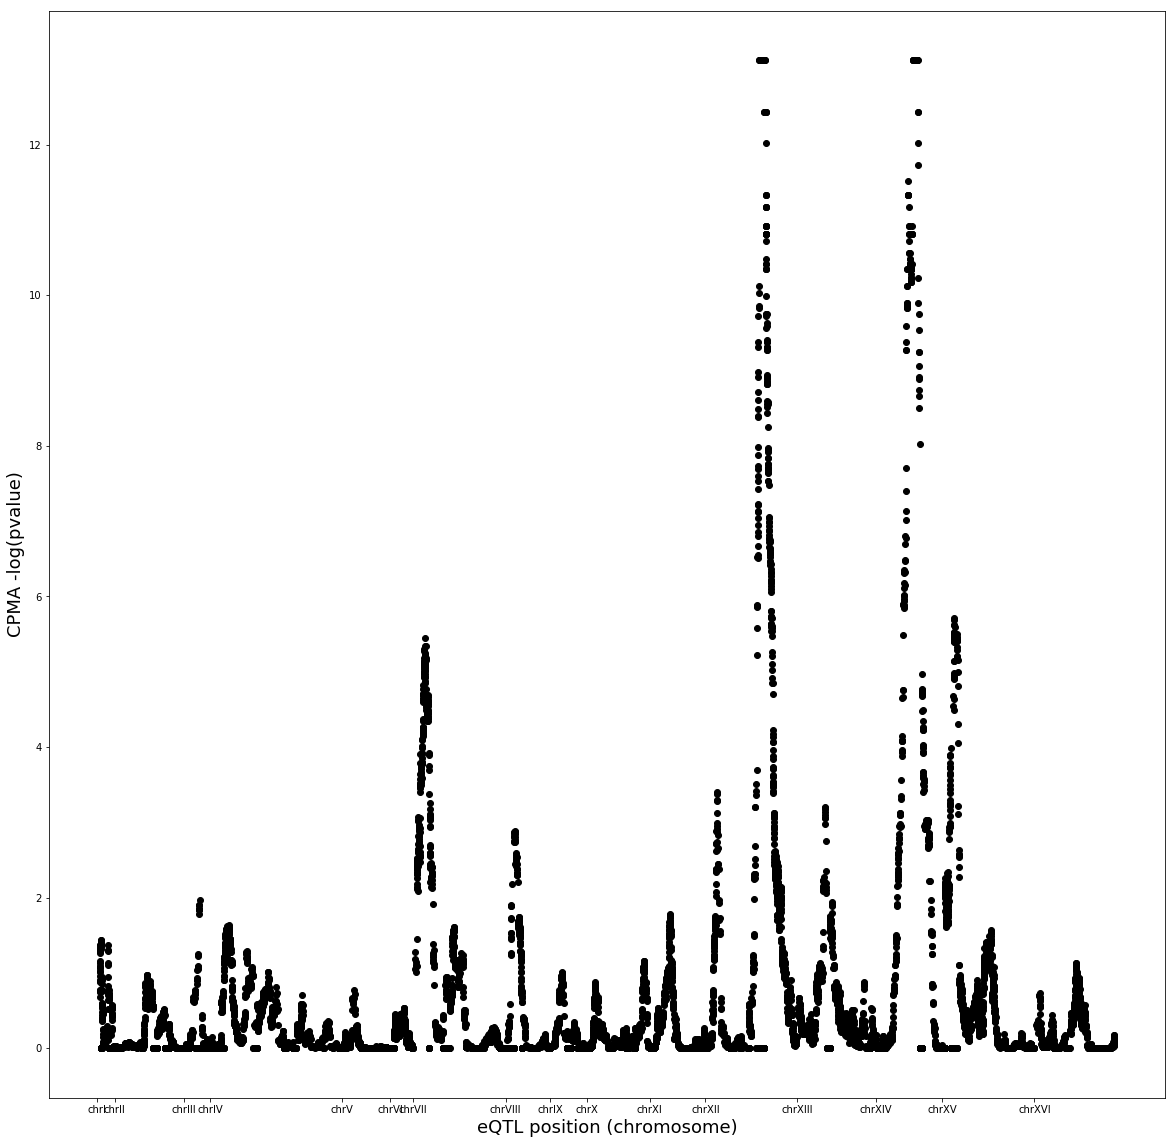

In [54]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA -log(pvalue)', fontsize=18)

In [10]:
x_pos = []
y_pos = []
for snp, row in cpma_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append((row[0]))

In [11]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA value')

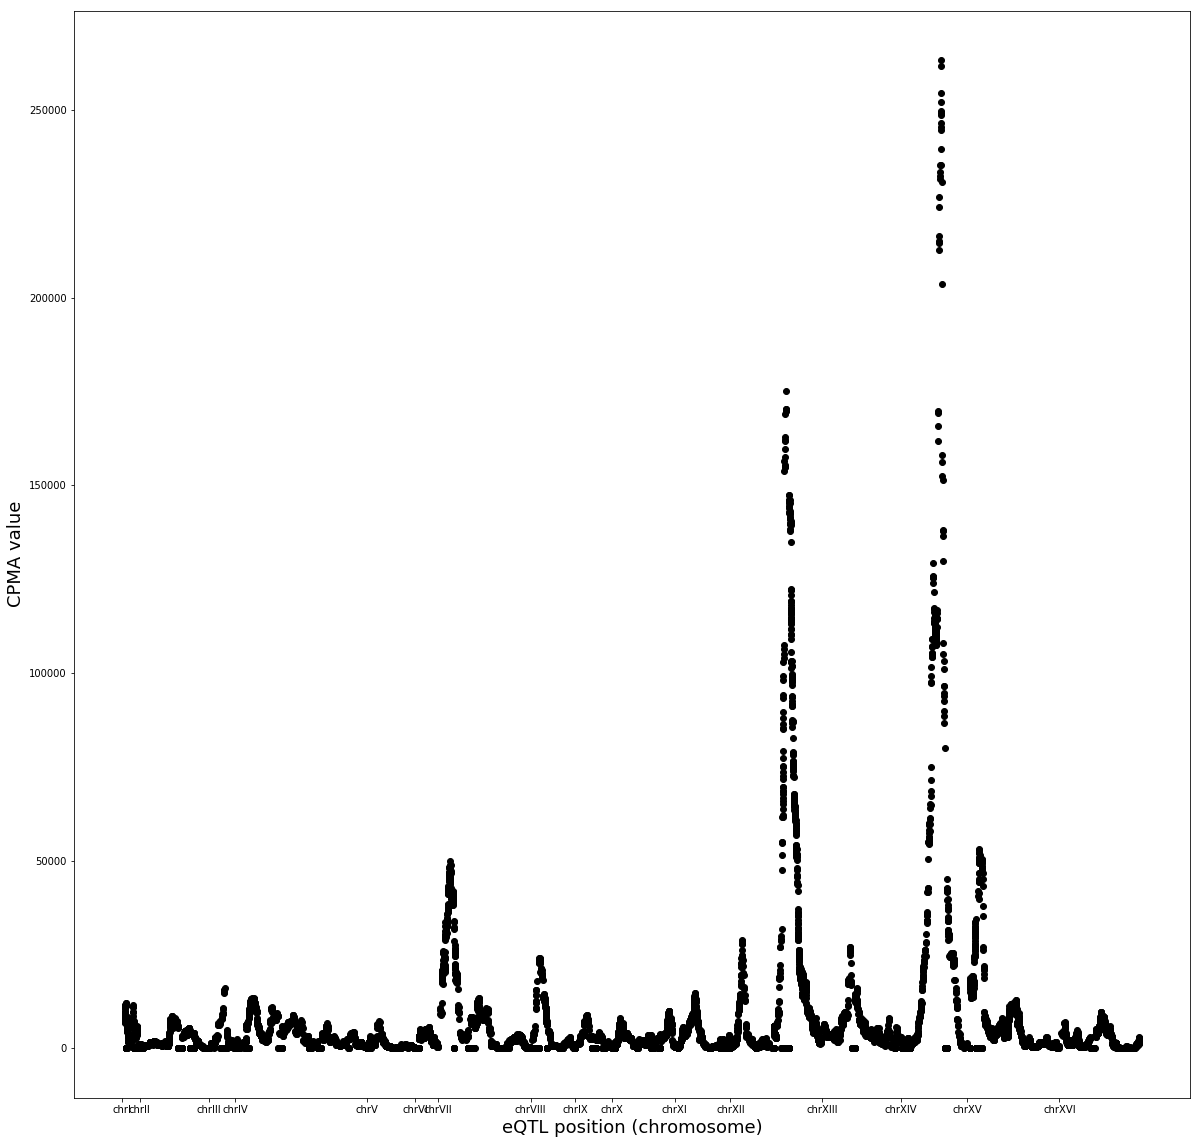

In [12]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA value', fontsize=18)

In [96]:
cpma_mix = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/CPMA/gene-snp-eqtl_cpma-mix_converted', sep='\t', index_col=0)

In [42]:
cpma_mix

mixture_tstat  predicted_T  predicted_L
snp                                                       
chrI:33040_A/G       8696.032275     0.131609    10.289716
chrI:33293_A/T       9003.819036     0.174341     8.631776
chrI:34170_T/A       9047.458111     0.176693     8.579996
chrI:34308_C/T       9067.302560     0.154046     9.458265
chrI:34554_A/G       9270.203719     0.146524     9.943379
...                          ...          ...          ...
chrXVI:925172_C/G    3170.562611     0.200025     4.381071
chrXVI:925497_A/C    3197.552831     0.215592     4.217931
chrXVI:925746_T/A    3091.526570     0.166085     4.785445
chrXVI:927980_A/G    3337.944689     0.282798     3.718319
chrXVI:928107_C/T    3168.753292     0.227750     4.067214

[11530 rows x 3 columns]

In [44]:
for snp, row in cpma_mix.iterrows():
    print(snp, row[1])
    break

chrI:33040_A/G 0.13160884663863506


In [27]:
cpma_mix.loc[cpma_mix['snp'] == 'chrI:138499_G/A']


snp  mixture_tstat  predicted_T  predicted_L
118  chrI:138499_G/A            NaN          0.5          1.0

In [97]:
cpma_mix_dropnan = cpma_mix.dropna(subset=['mixture_tstat'])

Text(0, 0.5, 'Count')

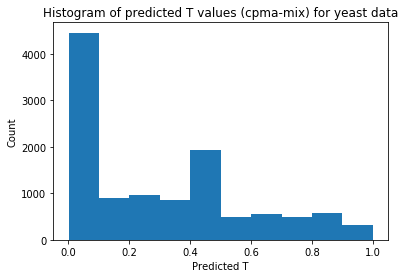

In [17]:
plt.hist(list(cpma_mix['predicted_T']))
plt.title('Histogram of predicted T values (cpma-mix) for yeast data')
plt.xlabel('Predicted T')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

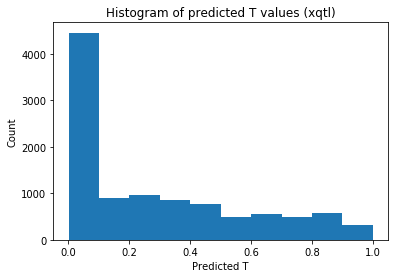

In [98]:
plt.hist(list(cpma_mix_dropnan['predicted_T']))
# plt.title('Histogram of predicted T values (xqtl) for yeast data after dropping nan mixture values')
plt.title('Histogram of predicted T values (xqtl)')

plt.xlabel('Predicted T')
plt.ylabel('Count')

In [99]:
x_pos = []
y_pos = []
for snp, row in cpma_mix_dropnan.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(row[1])

Text(0, 0.5, 'xqtl proportion target genes')

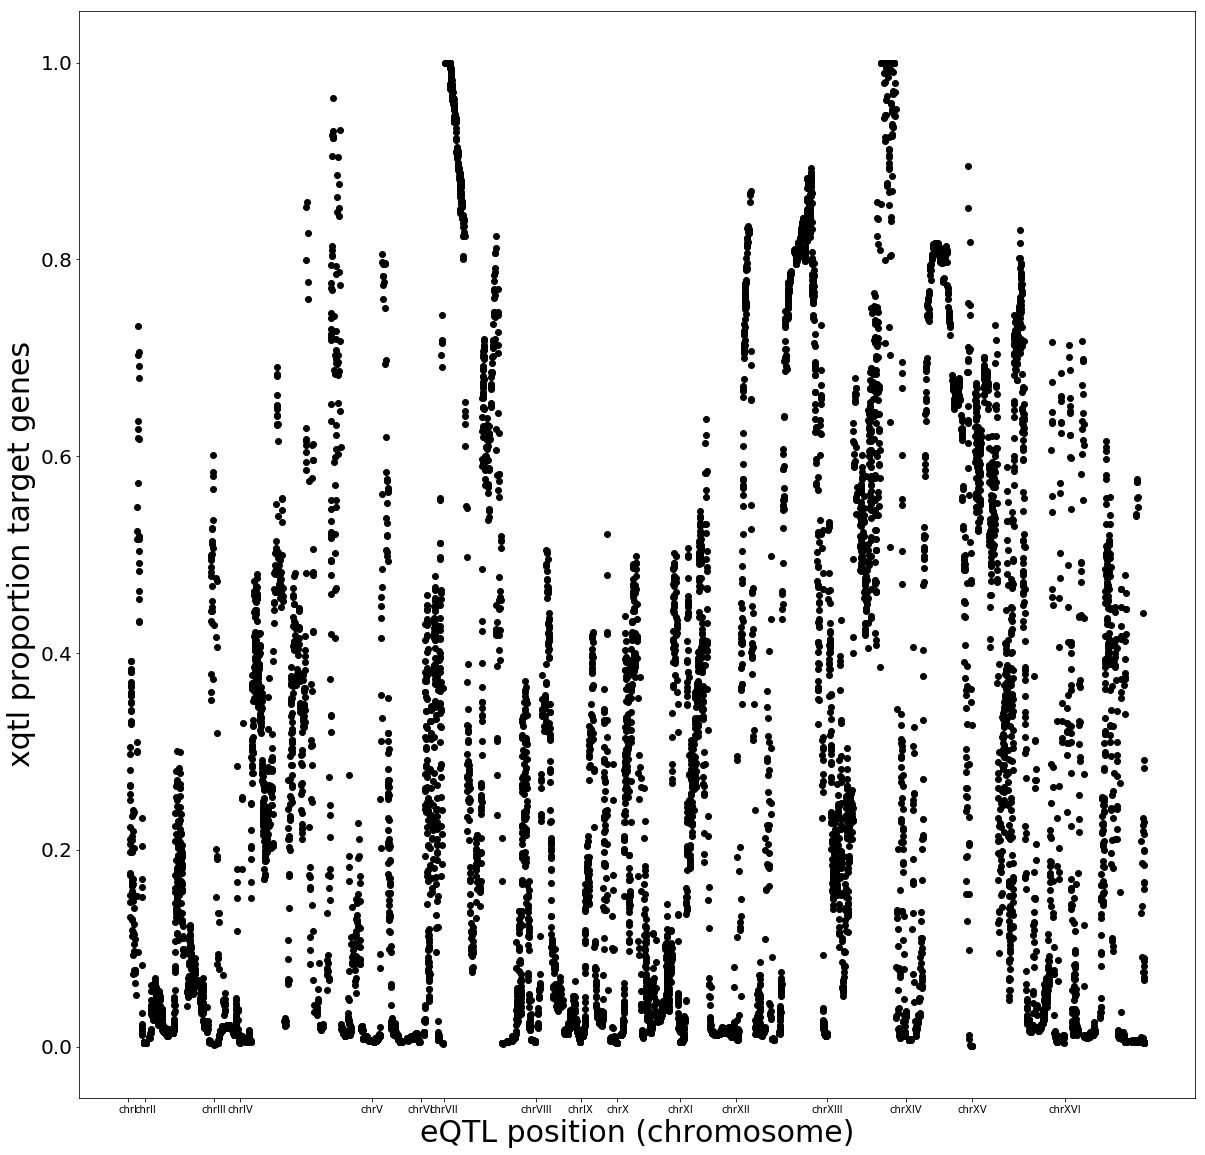

In [100]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

plt.yticks(fontsize=20)
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=30)
plt.ylabel('xqtl proportion target genes', fontsize=30)

In [21]:
x_pos = []
y_pos = []
for snp, row in cpma_mix_dropnan.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(row[0])

Text(0, 0.5, 'CPMAx values')

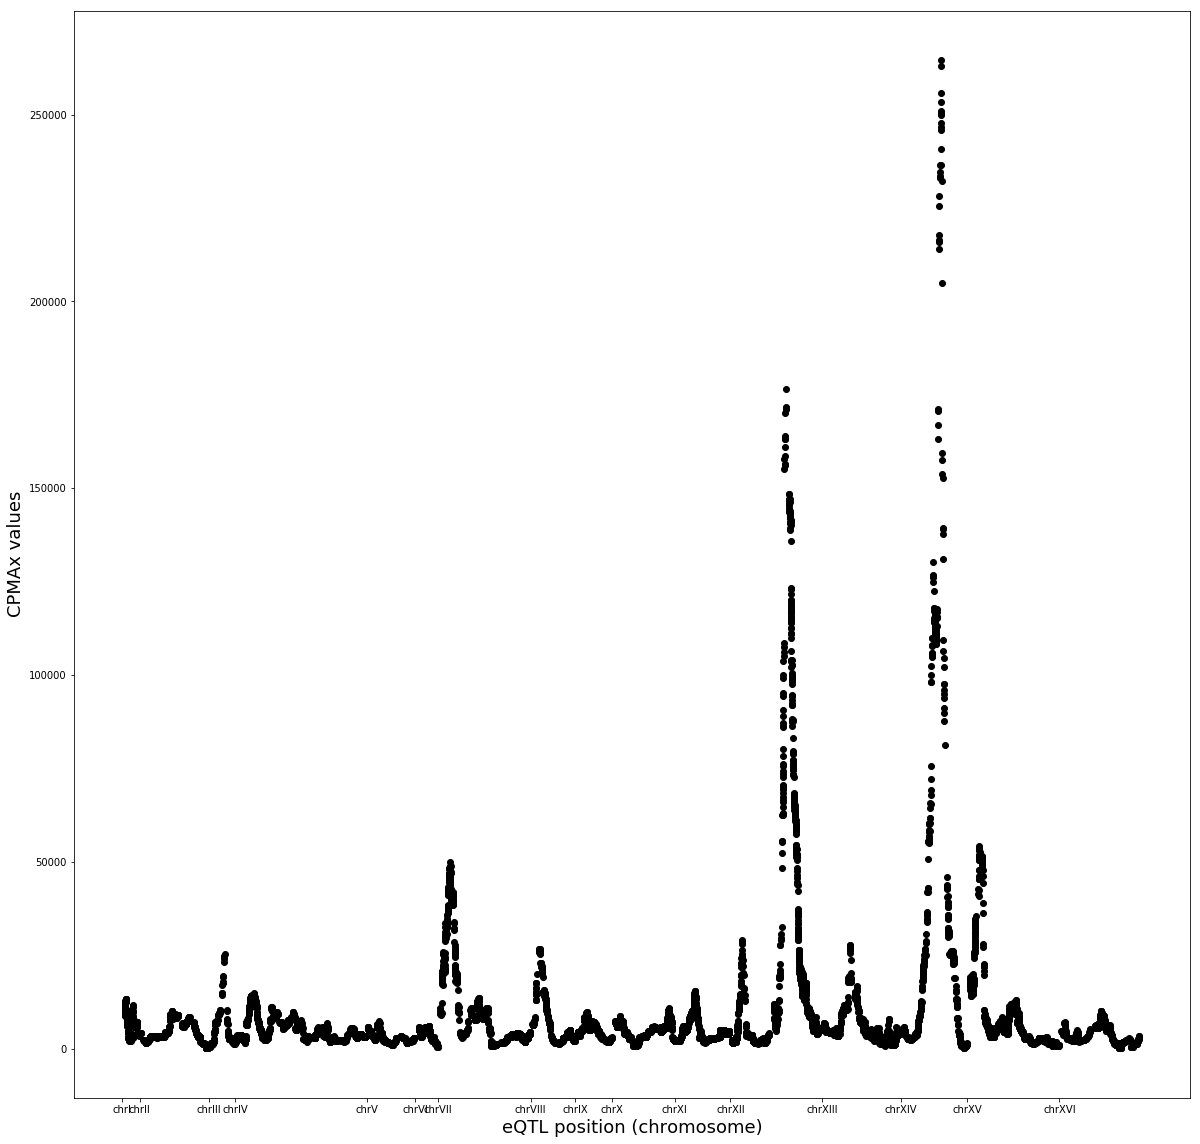

In [22]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMAx values', fontsize=18)

Text(0, 0.5, 'CPMA % target genes')

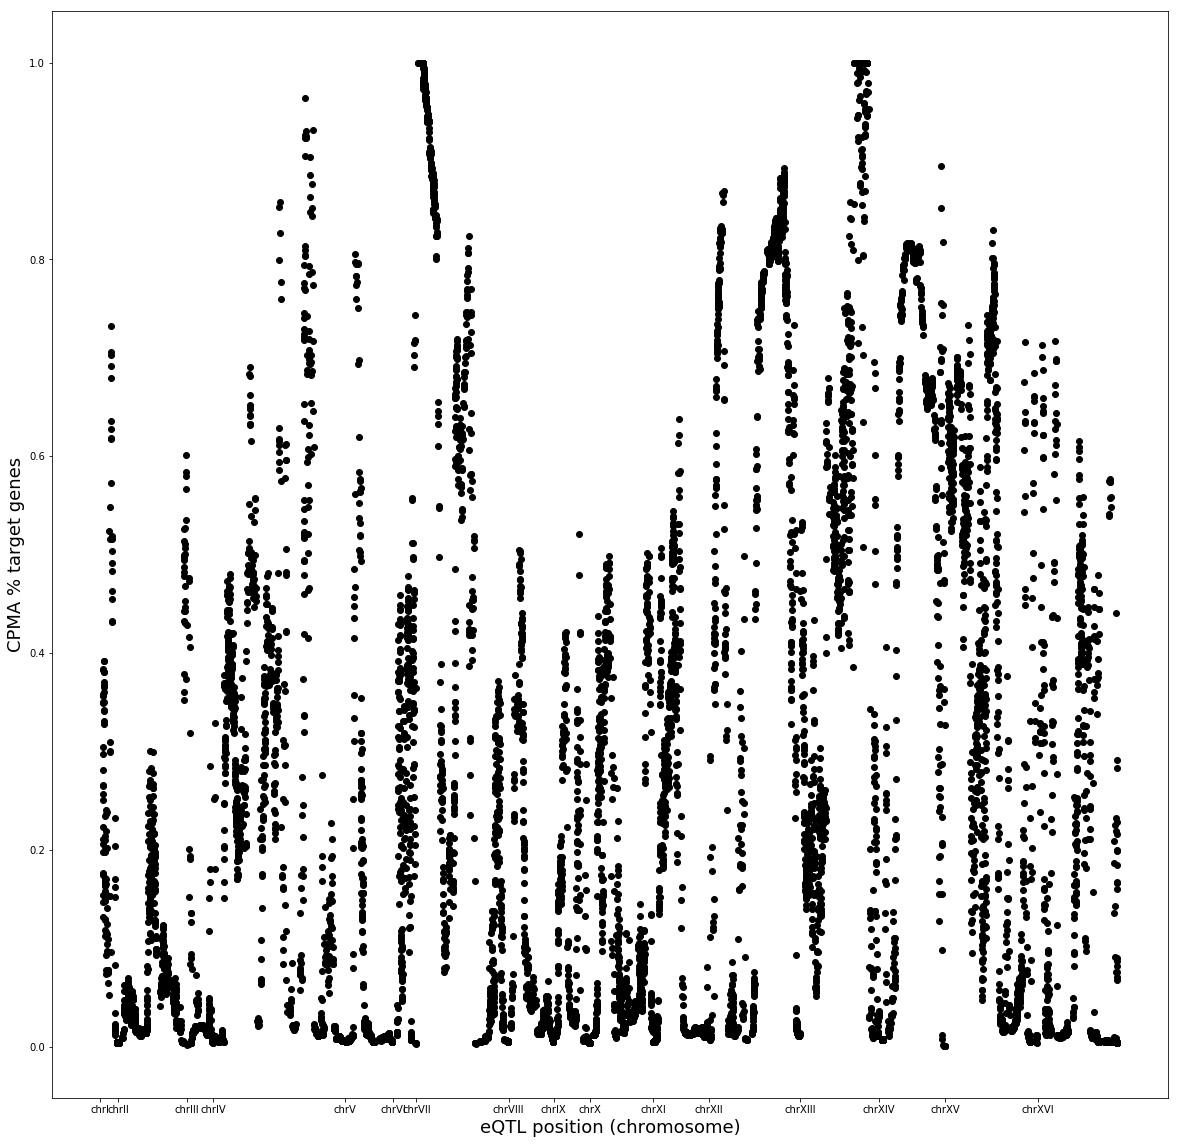

In [53]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA % target genes', fontsize=18)

In [70]:
cpma_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t', index_col=0)
cpma_mix = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/CPMA/gene-snp-eqtl_cpma-mix_converted', sep='\t', index_col=0)


In [71]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpma_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]
    

labels_pos = []
labels = []   
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

In [91]:
x_pos_cpma = []
y_pos_cpma = []
for snp, row in cpma_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos_cpma.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos_cpma.append(row[0]) 
    
x_pos_xqtl = []
y_pos_xqtl = []
for snp, row in cpma_mix_dropnan.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos_xqtl.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos_xqtl.append(row[0])

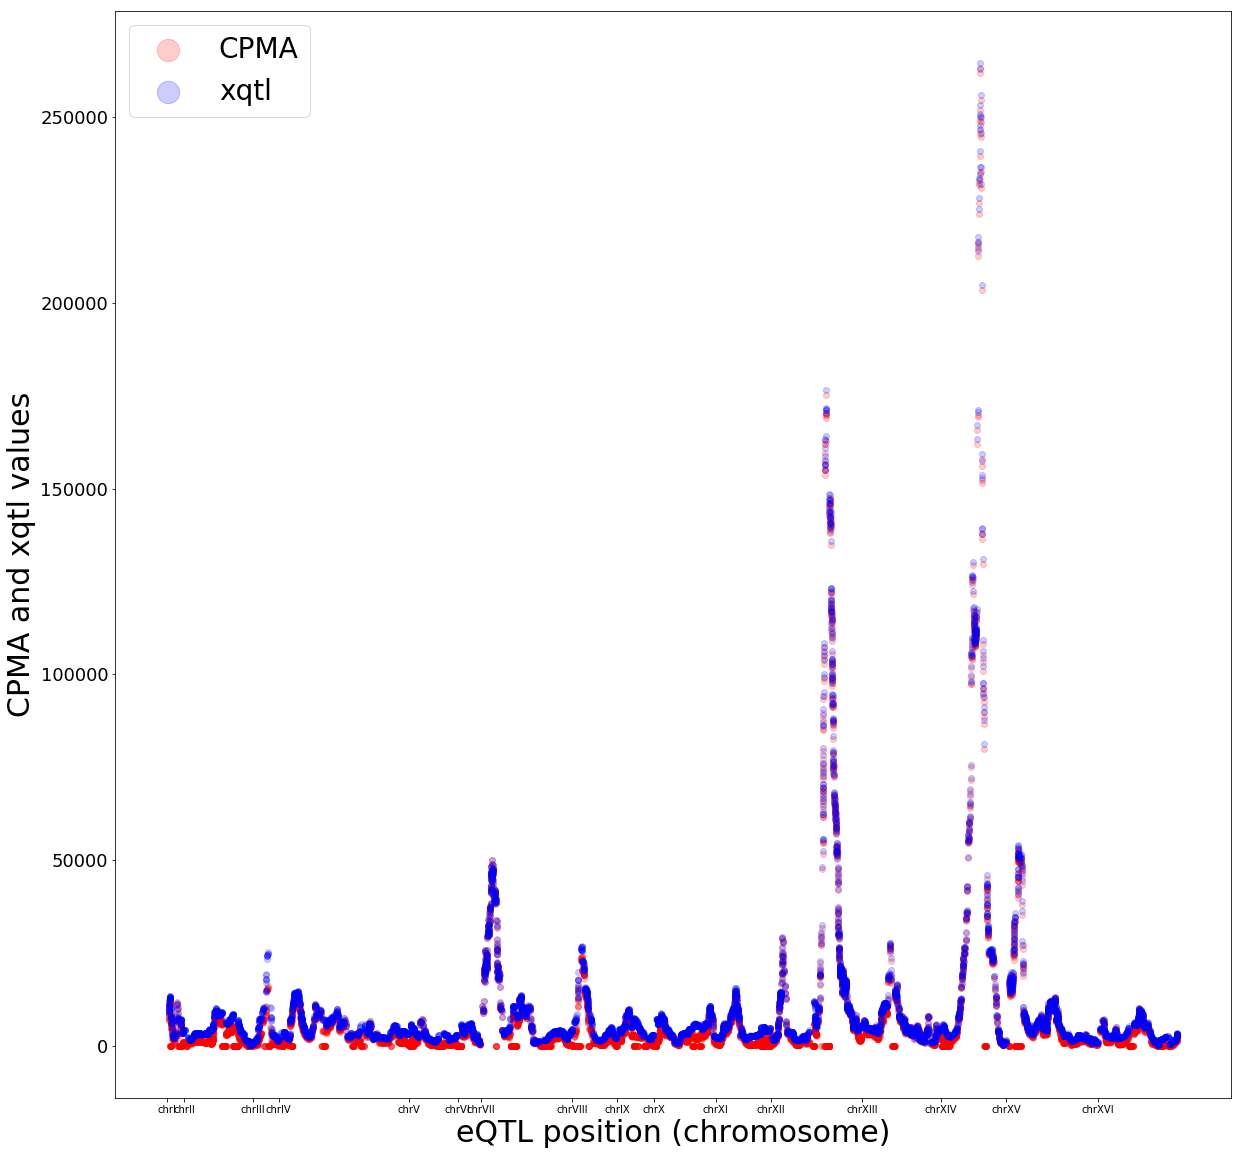

<Figure size 432x288 with 0 Axes>

In [95]:
# plt.figure(figsize=(12, 12))
# fig, ax = plt.subplots(figsize=(20, 20))
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(111)

ax1.scatter(x_pos_cpma, y_pos_cpma, color='red', alpha=0.2, label='CPMA')
ax1.scatter(x_pos_xqtl, y_pos_xqtl, color='blue', alpha=0.2, label='xqtl')

plt.yticks(fontsize=18)
ax1.set_xticks(labels_pos)
ax1.set_xticklabels(labels)
lgnd = plt.legend(loc='upper left', scatterpoints=1, prop={'size': 28})
lgnd.legendHandles[0]._sizes = [500]
lgnd.legendHandles[1]._sizes = [500]
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=30)
plt.ylabel('CPMA and xqtl values', fontsize=30)
plt.show()
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/yeast/authors_analysis/cpma_xqtl_map.pdf')  

## GO analysis

In [109]:
gene_info

{'YDL248W': ['chrIV', 1802, 2953.0],
 'YDL247W-A': ['chrIV', 3762, 3836.0],
 'YDL247W': ['chrIV', 5985, 7814.0],
 'YDL246C': ['chrIV', 8683, 9756.0],
 'YDL245C': ['chrIV', 11657, 13360.0],
 'YDL244W': ['chrIV', 16204, 17226.0],
 'YDL243C': ['chrIV', 17577, 18566.0],
 'YDL242W': ['chrIV', 18959, 19312.0],
 'YDL241W': ['chrIV', 20635, 21006.0],
 'YDL240C-A': ['chrIV', 22471, 22608.0],
 'YDL240W': ['chrIV', 22823, 25876.0],
 'YDL239C': ['chrIV', 26403, 28775.0],
 'YDL238C': ['chrIV', 28985, 30454.0],
 'YDL237W': ['chrIV', 30657, 31829.0],
 'YDL236W': ['chrIV', 32296, 33234.0],
 'YDL235C': ['chrIV', 33415, 33918.0],
 'YDL234C': ['chrIV', 34237, 36477.0],
 'YDL233W': ['chrIV', 36797, 38173.0],
 'YDL232W': ['chrIV', 38487, 38597.0],
 'YDL231C': ['chrIV', 38867, 42244.0],
 'YDL230W': ['chrIV', 42700, 43707.0],
 'YDL229W': ['chrIV', 44065, 45906.0],
 'YDL228C': ['chrIV', 45277, 45918.0],
 'YDL227C': ['chrIV', 46271, 48031.0],
 'YDL226C': ['chrIV', 51115, 52173.0],
 'YDL225W': ['chrIV', 52445, 

In [ ]:
def test_range(n, start_num, end_num = 0):
  return start_num <= n <= end_num if end_num >= start_num else end_num <= n <= start_num

In [110]:
low_T_list = cpma_mix_dropnan.loc[cpma_mix_dropnan['predicted_T'] < 0.05]
high_T_list = cpma_mix_dropnan.loc[cpma_mix_dropnan['predicted_T'] > 0.9]

In [118]:
low_genes = []
for index, row in low_T_list.iterrows():
    snp = index.split(':')
    chrom = snp[0]
    poos = snp[1].split('_')[0]
    break

168836


In [108]:
cpma_mix_dropnan.loc[cpma_mix_dropnan['predicted_T'] < 0.05]

mixture_tstat  predicted_T  predicted_L
snp                                                        
chrI:168836_G/A       5652.209618     0.011920    50.248272
chrI:169217_T/C       5716.059740     0.016195    38.722805
chrI:169422_C/T       5752.335479     0.016273    38.776253
chrI:169638_T/C       5756.964440     0.014614    42.623027
chrI:169830_A/G       5757.933337     0.014753    42.288161
...                           ...          ...          ...
chrXVI:920625_CA/C    2794.841468     0.004826    60.128332
chrXVI:921639_T/C     2940.866340     0.004456    67.417375
chrXVI:921845_G/A     2934.995777     0.003643    80.889087
chrXVI:922220_A/G     2957.167470     0.004194    71.578252
chrXVI:922297_T/C     3005.959987     0.003919    77.163985

[3754 rows x 3 columns]

In [61]:
yeast = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/covariates.csv', sep='\t', index_col=0).T

In [63]:
yeast.to_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/covariates.csv', sep='\t')

In [62]:
yeast

A01_01-A01-A1-BYxRM_eQTL_10-H6  \
(Intercept)                                          1.0   
gbatch.factBYxRM_eQTL_02                             0.0   
gbatch.factBYxRM_eQTL_03                             0.0   
gbatch.factBYxRM_eQTL_04                             0.0   
gbatch.factBYxRM_eQTL_05                             0.0   
gbatch.factBYxRM_eQTL_06                             0.0   
gbatch.factBYxRM_eQTL_07                             0.0   
gbatch.factBYxRM_eQTL_08                             0.0   
gbatch.factBYxRM_eQTL_09                             0.0   
gbatch.factBYxRM_eQTL_10                             1.0   
gbatch.factBYxRM_eQTL_11                             0.0   
gbatch.factBYxRM_eQTL_12                             0.0   
gbatch.factBYxRM_eQTL_13                             0.0   
OD.cov                                               0.2   

                          A01_02-A01-A2-BYxRM_eQTL_11-F3  \
(Intercept)                                        1.000   
gbatch.factBYxRM_eQTL_02                           0.000   
gbatch.factBYxRM_eQTL_03                           0.000   
gbatch.factBYxRM_eQTL_04                           0.000   
gbatch.factBYxRM_eQTL_05                           0.000   
gbatch.factBYxRM_eQTL_06                           0.000   
gbatch.factBYxRM_eQTL_07                           0.000   
gbatch.factBYxRM_eQTL_08                           0.000   
gbatch.factBYxRM_eQTL_09                           0.000   
gbatch.factBYxRM_eQTL_10                           0.000   
gbatch.factBYxRM_eQTL_11                           1.000   
gbatch.factBYxRM_eQTL_12                           0.000   
gbatch.factBYxRM_eQTL_13                           0.000   
OD.cov                                             0.255   

                          A01_03-A01-A3-BYxRM_eQTL_11-C6  \
(Intercept)                                        1.000   
gbatch.factBYxRM_eQTL_02                           0.000   
gbatch.factBYxRM_eQTL_03                           0.000   
gbatch.factBYxRM_eQTL_04                           0.000   
gbatch.factBYxRM_eQTL_05                           0.000   
gbatch.factBYxRM_eQTL_06                           0.000   
gbatch.factBYxRM_eQTL_07                           0.000   
gbatch.factBYxRM_eQTL_08                           0.000   
gbatch.factBYxRM_eQTL_09                           0.000   
gbatch.factBYxRM_eQTL_10                           0.000   
gbatch.factBYxRM_eQTL_11                           1.000   
gbatch.factBYxRM_eQTL_12                           0.000   
gbatch.factBYxRM_eQTL_13                           0.000   
OD.cov                                             0.328   

                          A01_04-A01-A4-BYxRM_eQTL_03-G2  \
(Intercept)                                        1.000   
gbatch.factBYxRM_eQTL_02                           0.000   
gbatch.factBYxRM_eQTL_03                           1.000   
gbatch.factBYxRM_eQTL_04                           0.000   
gbatch.factBYxRM_eQTL_05                           0.000   
gbatch.factBYxRM_eQTL_06                           0.000   
gbatch.factBYxRM_eQTL_07                           0.000   
gbatch.factBYxRM_eQTL_08                           0.000   
gbatch.factBYxRM_eQTL_09                           0.000   
gbatch.factBYxRM_eQTL_10                           0.000   
gbatch.factBYxRM_eQTL_11                           0.000   
gbatch.factBYxRM_eQTL_12                           0.000   
gbatch.factBYxRM_eQTL_13                           0.000   
OD.cov                                             0.128   

                          A01_05-A01-A5-BYxRM_eQTL_11-F10  \
(Intercept)                                         1.000   
gbatch.factBYxRM_eQTL_02                            0.000   
gbatch.factBYxRM_eQTL_03                            0.000   
gbatch.factBYxRM_eQTL_04                            0.000   
gbatch.factBYxRM_eQTL_05                            0.000   
gbatch.factBYxRM_eQTL_06                            0.00

In [64]:
beta = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/beta.txt')

In [70]:
for row in beta:
    print(row)
    np.random.shuffle(row)
    print(row)
    

[0.1 0.1 0.1 ... 0.  0.1 0.1]
[0.  0.1 0.1 ... 0.1 0.1 0. ]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]


In [79]:
np.savetxt(X=beta, fname='/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/beta.txt')

In [78]:
?np.savetxt

In [96]:
pvalues.columns

Index(['chrI:31567', 'chrI:33448', 'chrI:35155', 'chrI:36509', 'chrI:37464',
       'chrI:39259', 'chrI:42177', 'chrI:42881', 'chrI:45899', 'chrI:48564',
       ...
       'chrXVI:921860', 'chrXVI:922909', 'chrXVI:924304', 'chrXVI:931376',
       'chrXVI:934034', 'chrXVI:938148', 'chrXVI:939279', 'chrXVI:943032',
       'chrXVI:943880', 'chrXVI:944603'],
      dtype='object', length=5726)

In [50]:
size[0]*4

21.749812339331736

In [39]:
snp = 'chrI:33040_A/G'
snp_chr = snp.split(':')
snp_pos = int(snp_chr[1].split('_')[0])
x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)


In [38]:
snp_chr

['chrI', '33040_A/G']

In [35]:
int(snp_coord[1].split('_')[0])

928107

In [36]:
snp_coord[1]

'928107_C/T'

In [40]:
snp_pos

33040

In [30]:
x_pos

[928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 

In [10]:
zscores

chrI:31567  chrI:33448  chrI:35155  chrI:36509  chrI:37464  \
chrI:33040_A/G     -31.598579   -0.972379   18.969061    0.979111   -1.186941   
chrI:33293_A/T     -31.622916   -0.984084   19.317666    1.125721   -1.007720   
chrI:34170_T/A     -31.511386   -0.885873   19.380271    1.078838   -1.051350   
chrI:34308_C/T     -31.217146   -0.853426   19.762337    1.199822   -1.004158   
chrI:34554_A/G     -30.970802   -0.775722   20.208265    1.082412   -0.859863   
...                       ...         ...         ...         ...         ...   
chrXVI:925172_C/G   -1.878288    1.656646    1.765346    0.078942    0.514008   
chrXVI:925497_A/C   -1.789710    1.689125    1.781295    0.019399    0.510535   
chrXVI:925746_T/A   -1.876742    1.517999    1.835628   -0.022717    0.477998   
chrXVI:927980_A/G   -1.756390    1.613718    1.929130   -0.150859    0.597739   
chrXVI:928107_C/T   -1.932257    1.432247    2.099137   -0.194546    0.446618   

                   chrI:39259  chrI:42177  chrI:42881  chrI:45899  chrI:48564  \
chrI:33040_A/G     -31.004637   -8.123816  -11.391039   -2.453455   -0.647279   
chrI:33293_A/T     -31.539507   -8.360404  -11.599305   -2.693453   -0.744684   
chrI:34170_T/A     -31.673859   -8.351817  -11.548686   -2.676125   -0.751790   
chrI:34308_C/T     -32.243206   -8.612855  -11.525665   -2.668514   -0.700326   
chrI:34554_A/G     -32.553584   -8.697921  -11.592931   -2.473533   -0.646193   
...                       ...         ...         ...         ...         ...   
chrXVI:925172_C/G    0.155787   -0.136514    1.802870   -0.454363    0.310212   
chrXVI:925497_A/C    0.099865   -0.097645    1.795782   -0.433946    0.282035   
chrXVI:925746_T/A    0.044040   -0.169780    1.634112   -0.490999    0.251663   
chrXVI:927980_A/G    0.275670   -0.007228    1.832706   -0.366203    0.554485   
chrXVI:928107_C/T    0.155701   -0.181337    1.728195   -0.359879    0.629918   

                   ...  chrXVI:924304  chrXVI:931376  chrXVI:934034  \
chrI:33040_A/G     ...       2.148648      -0.195722      -0.016357   
chrI:33293_A/T     ...       2.224936      -0.501589      -0.153324   
chrI:34170_T/A     ...       2.192915      -0.476664      -0.101812   
chrI:34308_C/T     ...       1.969360      -0.306733      -0.031491   
chrI:34554_A/G     ...       2.107095      -0.390783       0.242107   
...                ...            ...            ...            ...   
chrXVI:925172_C/G  ...      20.650455      -5.819924       1.783867   
chrXVI:925497_A/C  ...      20.677838      -5.790738       1.738267   
chrXVI:925746_T/A  ...      20.716429      -5.802717       1.826944   
chrXVI:927980_A/G  ...      21.052546      -5.561080       1.699271   
chrXVI:928107_C/T  ...      21.159144      -5.425300       1.662000   

                   chrXVI:938148  chrXVI:939279  chrXVI:943032  chrXVI:943880  \
chrI:33040_A/G          1.399266      -0.344609      -0.526027      -0.255646   
chrI:33293_A/T          1.289595      -0.386804      -0.740686      -0.427971   
chrI:34170_T/A          1.326720      -0.308631      -0.757939      -0.443332   
chrI:34308_C/T          1.394985      -0.229060      -0.685074      -0.543311   
chrI:34554_A/G          1.661360      -0.179508      -0.678642      -0.497393   
...                          ...            ...            ...            ...   
chrXVI:925172_C/G      -1.959426     -18.699526     -17.405282     -17.440643   
chrXVI:925497_A/C      -2.021244     -18.692003     -17.397571     -17.531723   
chrXVI:925746_T/A      -2.008670     -18.728739     -17.396632     -17.484141   
chrXVI:927980_A/G      -2.306076     -19.316015     -17.630722     -17.972464   
chrXVI:928107_C/T      -2.298656     -19.454591     -17.666149     -18.134631   

                   chrXVI:944603  chrM:46723  chrM:48901  
chrI:33040_A/G         -0.810013   -0.530052    1.000394  
chrI:33293_A/T         -0.860122   -0.651815    1.042772  
chrI:34170_T/A         -0.869619   -0.648872    0.945447  
chrI:34308_

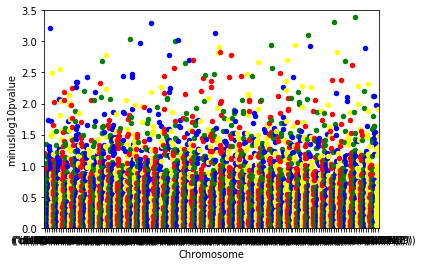

In [52]:
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# some sample data
df = DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],
'pvalue' : uniform.rvs(size=10000),
'chromosome1' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)],
'chromosome2' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)]})

# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df.chromosome1 = df.chromosome1.astype('category')
df.chromosome1 = df.chromosome1.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chromosome1', 'chromosome2'])

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby((['chromosome1', 'chromosome2']))

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])
ax.set_xlabel('Chromosome')
plt.show()

In [47]:
df

gene    pvalue chromosome1 chromosome2  minuslog10pvalue   ind
5        gene-5  0.012514        ch-0        ch-0          1.902597     0
222    gene-222  0.093732        ch-0        ch-0          1.028110     1
226    gene-226  0.997872        ch-0        ch-0          0.000925     2
455    gene-455  0.232351        ch-0        ch-0          0.633855     3
591    gene-591  0.263516        ch-0        ch-0          0.579193     4
...         ...       ...         ...         ...               ...   ...
9247  gene-9247  0.835139       ch-11        ch-9          0.078241  9995
9479  gene-9479  0.405785       ch-11        ch-9          0.391704  9996
9553  gene-9553  0.545230       ch-11        ch-9          0.263420  9997
9590  gene-9590  0.172721       ch-11        ch-9          0.762656  9998
9712  gene-9712  0.155003       ch-11        ch-9          0.809659  9999

[10000 rows x 6 columns]

In [49]:
df_grouped.chromosome1

In [48]:
?group.plot

# Rerunning yeast data

In [80]:
geno_unfiltered = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_genotypes.txt', sep='\t', index_col=0)

In [82]:
geno_unfiltered.T

A01_01  A01_02  A01_03  A01_04  A01_05  A01_06  A01_07  \
chrI:33040_A/G          1      -1       1       1      -1      -1      -1   
chrI:33048_A/C          1      -1       1       1      -1      -1      -1   
chrI:33070_A/T          1      -1       1       1      -1      -1      -1   
chrI:33077_G/A          1      -1       1       1      -1      -1      -1   
chrI:33147_G/T          1      -1       1       1      -1      -1      -1   
...                   ...     ...     ...     ...     ...     ...     ...   
chrXVI:926181_C/T      -1       1      -1       1       1      -1       1   
chrXVI:927980_A/G      -1       1      -1       1       1      -1       1   
chrXVI:928107_C/T      -1       1      -1       1       1      -1       1   
chrXVI:929522_C/T      -1       1      -1       1       1      -1       1   
chrXVI:929870_C/T      -1       1      -1       1       1      -1       1   

                   A01_08  A01_09  A01_10  ...  A11_86  A11_87  A11_88  \
chrI:33040_A/G         -1      -1       1  ...       1       1       1   
chrI:33048_A/C         -1      -1       1  ...       1       1       1   
chrI:33070_A/T         -1      -1       1  ...       1       1       1   
chrI:33077_G/A         -1      -1       1  ...       1       1       1   
chrI:33147_G/T         -1      -1       1  ...       1       1       1   
...                   ...     ...     ...  ...     ...     ...     ...   
chrXVI:926181_C/T      -1       1       1  ...      -1      -1       1   
chrXVI:927980_A/G      -1       1       1  ...      -1      -1       1   
chrXVI:928107_C/T      -1       1       1  ...      -1      -1       1   
chrXVI:929522_C/T      -1       1       1  ...      -1      -1       1   
chrXVI:929870_C/T      -1       1       1  ...      -1      -1       1   

                   A11_89  A11_91  A11_92  A11_93  A11_94  A11_95  A11_96  
chrI:33040_A/G          1       1       1      -1      -1       1      -1  
chrI:33048_A/C          1       1       1      -1      -1       1      -1  
chrI:33070_A/T          1       1       1      -1      -1       1      -1  
chrI:33077_G/A          1       1       1      -1      -1       1      -1  
chrI:33147_G/T          1       1       1      -1      -1       1      -1  
...                   ...     ...     ...     ...     ...     ...     ...  
chrXVI:926181_C/T       1       1      -1       1       1       1       1  
chrXVI:927980_A/G       1       1      -1       1       1       1       1  
chrXVI:928107_C/T       1       1      -1       1       1       1       1  
chrXVI:929522_C/T       1       1      -1       1       1       1       1  
chrXVI:929870_C/T       1       1      -1       1       1       1       1  

[42052 rows x 1012 columns]

In [83]:
geno_results = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/yeast_pvals.csv', sep='\t', index_col=0)

In [96]:
geno_results

YAL062W   YAL061W       YAL060W   YAL059W   YAL058W  \
chrI:33040_A/G     3.861753e-219  0.330862  3.073470e-80  0.327525  0.235251   
chrI:33293_A/T     1.787914e-219  0.325074  3.815114e-83  0.260283  0.313589   
chrI:34170_T/A     6.065924e-218  0.375686  1.132499e-83  0.280660  0.293098   
chrI:34308_C/T     6.235902e-214  0.393423  6.282698e-87  0.230208  0.315303   
chrI:34554_A/G     1.333376e-210  0.437913  8.280784e-91  0.279070  0.389865   
...                          ...       ...           ...       ...       ...   
chrXVI:925172_C/G   6.034183e-02  0.097591  7.750564e-02  0.937079  0.607247   
chrXVI:925497_A/C   7.350047e-02  0.091195  7.486422e-02  0.984523  0.609677   
chrXVI:925746_T/A   6.055342e-02  0.129015  6.641264e-02  0.981876  0.632652   
chrXVI:927980_A/G   7.902179e-02  0.106589  5.371471e-02  0.880087  0.550014   
chrXVI:928107_C/T   5.332773e-02  0.152073  3.580483e-02  0.845749  0.655151   

                         YAL056W       YAL055W       YAL054C   YAL053W  \
chrI:33040_A/G     4.668042e-211  4.517514e-16  4.634283e-30  0.014149   
chrI:33293_A/T     2.497403e-218  6.250381e-17  4.154383e-31  0.007072   
chrI:34170_T/A     3.560066e-220  6.722090e-17  7.495775e-31  0.007448   
chrI:34308_C/T     4.380498e-228  7.126341e-18  9.795322e-31  0.007619   
chrI:34554_A/G     1.863061e-232  3.380194e-18  4.475489e-31  0.013378   
...                          ...           ...           ...       ...   
chrXVI:925172_C/G   8.762012e-01  8.914150e-01  7.140864e-02  0.649568   
chrXVI:925497_A/C   9.204513e-01  9.222140e-01  7.252913e-02  0.664328   
chrXVI:925746_T/A   9.648722e-01  8.651830e-01  1.022354e-01  0.623427   
chrXVI:927980_A/G   7.828019e-01  9.942327e-01  6.684636e-02  0.714214   
chrXVI:928107_C/T   8.762688e-01  8.561030e-01  8.395319e-02  0.718938   

                    YAL051W  ...       YPR194C       YPR196W   YPR198W  \
chrI:33040_A/G     0.517451  ...  3.166228e-02  8.448282e-01  0.986950   
chrI:33293_A/T     0.456463  ...  2.608555e-02  6.159566e-01  0.878143   
chrI:34170_T/A     0.452178  ...  2.831347e-02  6.336017e-01  0.918906   
chrI:34308_C/T     0.483724  ...  4.891177e-02  7.590463e-01  0.974878   
chrI:34554_A/G     0.518154  ...  3.510933e-02  6.959574e-01  0.808698   
...                     ...  ...           ...           ...       ...   
chrXVI:925172_C/G  0.756400  ...  9.670483e-95  5.887447e-09  0.074445   
chrXVI:925497_A/C  0.777917  ...  5.484371e-95  7.007801e-09  0.082164   
chrXVI:925746_T/A  0.801302  ...  2.462888e-95  6.524871e-09  0.067708   
chrXVI:927980_A/G  0.579247  ...  2.167222e-98  2.681096e-08  0.089268   
chrXVI:928107_C/T  0.528748  ...  2.273110e-99  5.785724e-08  0.096513   

                    YPR199C       YPR200C       YPR202W       YPR203W  \
chrI:33040_A/G     0.161733  7.303880e-01  5.988694e-01  7.982242e-01   
chrI:33293_A/T     0.197191  6.989013e-01  4.588841e-01  6.686725e-01   
chrI:34170_T/A     0.184601  7.576026e-01  4.484877e-01  6.575256e-01   
chrI:34308_C/T     0.163020  8.188222e-01  4.932972e-01  5.869156e-01   
chrI:34554_A/G     0.096641  8.575388e-01  4.973650e-01  6.189121e-01   
...                     ...           ...           ...           ...   
chrXVI:925172_C/G  0.050063  4.994700e-78  7.523509e-68  4.054880e-68   
chrXVI:925497_A/C  0.043255  5.751282e-78  8.607659e-68  8.204461e-69   
chrXVI:925746_T/A  0.044572  2.886750e-78  8.749941e-68  1.892447e-68   
chrXVI:927980_A/G  0.021106  3.939153e-83  1.431274e-69  3.201737e-72   
chrXVI:928107_C/T  0.021524  2.664715e-84  7.643969e-70  1.698364e-73   

                         YPR204W     Q0130     Q0140  
chrI:33040_A/G      4.179327e-01  0.596076  0.317120  
chrI:33293_A/T      3.897215e-01  0.514521  0.297054  
chrI:34170_T/A      3.845088e-01  0.516421  0.344431  
chrI:34308_C/T      4.443877e-01  0.333563  0.339269  
chrI:34554_A/G      4.433441e-01  0.320940  0.448781  
...                          ...       ...       ...  
chrXVI:925172_C/G   2.47

In [90]:
geno_filtered = geno_unfiltered[list(geno_results.index)]

In [93]:
(geno_filtered.T).to_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_genotypes_filtered.txt', sep='\t')

In [94]:
expression_unfiltered = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_expression.txt', sep='\t', index_col=0)

In [100]:
dict_name = {}
for i in expression_unfiltered.index:
    dict_name[i] = i.split('-')[0]

In [104]:
expression_unfiltered_rename = expression_unfiltered.rename(index=dict_name)

In [107]:
(expression_unfiltered_rename.T).to_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_expression_rename.txt', sep='\t')

In [110]:
covariates = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_covariates.csv', index_col=0)

In [121]:
dict_name_cov = {}
for i in covariates.index:
    dict_name_cov[i] = i.split('-')[0]

In [123]:
covariates_rename = covariates.rename(index=dict_name_cov)

In [126]:
(covariates_rename.T).to_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/SI_Data_covariates_rename.txt', sep='\t')

## eQTL plots with rerun data

In [145]:
pvals_rerun = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/Simulation_0/CPMA/yeast_matrixeQTL_filtered_pvalue_converted.gz', sep='\t', index_col=0)

In [128]:
pvals_rerun

Q0130     Q0140   YAL001C   YAL002W       YAL003W  \
SNP                                                                      
chrI:107538_G/A   0.451741  0.667896  0.461420  0.159539  2.852628e-06   
chrI:109735_A/G   0.327707  0.726009  0.051285  0.023618  9.583879e-12   
chrI:112136_G/T   0.332194  0.924714  0.058243  0.021835  1.161761e-11   
chrI:112549_G/A   0.345638  0.760519  0.062166  0.026010  2.154974e-11   
chrI:114628_G/T   0.250746  0.525692  0.022003  0.002580  2.034214e-13   
...                    ...       ...       ...       ...           ...   
chrXVI:97006_T/C  0.960070  0.682336  0.233938  0.344706  9.879504e-02   
chrXVI:98320_T/C  0.940139  0.696400  0.242723  0.364522  9.073272e-02   
chrXVI:98933_T/C  0.862711  0.730750  0.259125  0.366351  8.737985e-02   
chrXVI:99253_C/G  0.796946  0.699231  0.294456  0.412725  8.711520e-02   
chrXVI:99579_T/C  0.834077  0.684162  0.298317  0.430542  8.400489e-02   

                       YAL005C   YAL007C   YAL008W   YAL009W   YAL010C  ...  \
SNP                                                                     ...   
chrI:107538_G/A   1.984744e-14  0.310353  0.022163  0.014721  0.074660  ...   
chrI:109735_A/G   2.451544e-25  0.654006  0.001146  0.000023  0.019745  ...   
chrI:112136_G/T   2.443477e-26  0.597864  0.001175  0.000024  0.019615  ...   
chrI:112549_G/A   1.237097e-25  0.632073  0.000775  0.000032  0.023666  ...   
chrI:114628_G/T   4.429822e-30  0.621528  0.000083  0.000008  0.003230  ...   
...                        ...       ...       ...       ...       ...  ...   
chrXVI:97006_T/C  1.493746e-01  0.309206  0.891071  0.673868  0.718442  ...   
chrXVI:98320_T/C  1.393207e-01  0.297541  0.964631  0.688323  0.764447  ...   
chrXVI:98933_T/C  1.109060e-01  0.301342  0.961379  0.700908  0.823096  ...   
chrXVI:99253_C/G  1.160771e-01  0.287104  0.992391  0.693104  0.863776  ...   
chrXVI:99579_T/C  1.259363e-01  0.286201  0.939060  0.685004  0.828963  ...   

                   YPR192W   YPR193C   YPR194C   YPR196W   YPR198W   YPR199C  \
SNP                                                                            
chrI:107538_G/A   0.054399  0.531499  0.013551  0.041892  0.889800  0.162931   
chrI:109735_A/G   0.368348  0.335683  0.098945  0.017629  0.116423  0.591535   
chrI:112136_G/T   0.442501  0.293197  0.068564  0.013984  0.135849  0.502439   
chrI:112549_G/A   0.386458  0.345152  0.072381  0.011942  0.159150  0.420728   
chrI:114628_G/T   0.285053  0.582400  0.064207  0.051181  0.198584  0.353554   
...                    ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  0.059718  0.876630  0.457350  0.850040  0.248011  0.324779   
chrXVI:98320_T/C  0.073191  0.934377  0.438834  0.821297  0.268852  0.357722   
chrXVI:98933_T/C  0.079854  0.962630  0.417666  0.878156  0.280404  0.384675   
chrXVI:99253_C/G  0.075367  0.971200  0.440899  0.978678  0.303464  0.395583   
chrXVI:99579_T/C  0.079355  0.953626  0.444233  0.999535  0.259096  0.374963   

                   YPR200C   YPR202W   YPR203W   YPR204W  
SNP                                                       
chrI:107538_G/A   0.164730  0.796554  0.828438  0.171755  
chrI:109735_A/G   0.492994  0.808132  0.625605  0.375474  
chrI:112136_G/T   0.378602  0.813620  0.710220  0.351569  
chrI:112549_G/A   0.429462  0.796617  0.740714  0.313860  
chrI:114628_G/T   0.434473  0.633599  0.966917  0.257561  
...                    ...       ...       ...       ...  
chrXVI:97006_T/C  0.061097  0.661414  0.421089  0.099430  
chrXVI:98320_T/C  0.060102  0.702533  0.400606  0.089776  
chrXVI:98933_T/C  0.044671  0.692260  0.350566  0.069927  
chrXVI:99253_C/G  0.067208  0.634717  0.386807  0.098941  
chrXVI:99579_T/C  0.066888  0.609199  0.378747  0.110111  

[11530 rows x 5720 columns]

In [137]:
pvalues.columns

Index(['chrI:31567', 'chrI:33448', 'chrI:35155', 'chrI:36509', 'chrI:37464',
       'chrI:39259', 'chrI:42177', 'chrI:42881', 'chrI:45899', 'chrI:48564',
       ...
       'chrXVI:921860', 'chrXVI:922909', 'chrXVI:924304', 'chrXVI:931376',
       'chrXVI:934034', 'chrXVI:938148', 'chrXVI:939279', 'chrXVI:943032',
       'chrXVI:943880', 'chrXVI:944603'],
      dtype='object', length=5726)

In [140]:
pvalues

YAL062W   YAL061W       YAL060W   YAL059W   YAL058W  \
chrI:33040_A/G     3.861753e-219  0.330862  3.073470e-80  0.327525  0.235251   
chrI:33293_A/T     1.787914e-219  0.325074  3.815114e-83  0.260283  0.313589   
chrI:34170_T/A     6.065924e-218  0.375686  1.132499e-83  0.280660  0.293098   
chrI:34308_C/T     6.235902e-214  0.393423  6.282698e-87  0.230208  0.315303   
chrI:34554_A/G     1.333376e-210  0.437913  8.280784e-91  0.279070  0.389865   
...                          ...       ...           ...       ...       ...   
chrXVI:925172_C/G   6.034183e-02  0.097591  7.750564e-02  0.937079  0.607247   
chrXVI:925497_A/C   7.350047e-02  0.091195  7.486422e-02  0.984523  0.609677   
chrXVI:925746_T/A   6.055342e-02  0.129015  6.641264e-02  0.981876  0.632652   
chrXVI:927980_A/G   7.902179e-02  0.106589  5.371471e-02  0.880087  0.550014   
chrXVI:928107_C/T   5.332773e-02  0.152073  3.580483e-02  0.845749  0.655151   

                         YAL056W       YAL055W       YAL054C   YAL053W  \
chrI:33040_A/G     4.668042e-211  4.517514e-16  4.634283e-30  0.014149   
chrI:33293_A/T     2.497403e-218  6.250381e-17  4.154383e-31  0.007072   
chrI:34170_T/A     3.560066e-220  6.722090e-17  7.495775e-31  0.007448   
chrI:34308_C/T     4.380498e-228  7.126341e-18  9.795322e-31  0.007619   
chrI:34554_A/G     1.863061e-232  3.380194e-18  4.475489e-31  0.013378   
...                          ...           ...           ...       ...   
chrXVI:925172_C/G   8.762012e-01  8.914150e-01  7.140864e-02  0.649568   
chrXVI:925497_A/C   9.204513e-01  9.222140e-01  7.252913e-02  0.664328   
chrXVI:925746_T/A   9.648722e-01  8.651830e-01  1.022354e-01  0.623427   
chrXVI:927980_A/G   7.828019e-01  9.942327e-01  6.684636e-02  0.714214   
chrXVI:928107_C/T   8.762688e-01  8.561030e-01  8.395319e-02  0.718938   

                    YAL051W  ...       YPR194C       YPR196W   YPR198W  \
chrI:33040_A/G     0.517451  ...  3.166228e-02  8.448282e-01  0.986950   
chrI:33293_A/T     0.456463  ...  2.608555e-02  6.159566e-01  0.878143   
chrI:34170_T/A     0.452178  ...  2.831347e-02  6.336017e-01  0.918906   
chrI:34308_C/T     0.483724  ...  4.891177e-02  7.590463e-01  0.974878   
chrI:34554_A/G     0.518154  ...  3.510933e-02  6.959574e-01  0.808698   
...                     ...  ...           ...           ...       ...   
chrXVI:925172_C/G  0.756400  ...  9.670483e-95  5.887447e-09  0.074445   
chrXVI:925497_A/C  0.777917  ...  5.484371e-95  7.007801e-09  0.082164   
chrXVI:925746_T/A  0.801302  ...  2.462888e-95  6.524871e-09  0.067708   
chrXVI:927980_A/G  0.579247  ...  2.167222e-98  2.681096e-08  0.089268   
chrXVI:928107_C/T  0.528748  ...  2.273110e-99  5.785724e-08  0.096513   

                    YPR199C       YPR200C       YPR202W       YPR203W  \
chrI:33040_A/G     0.161733  7.303880e-01  5.988694e-01  7.982242e-01   
chrI:33293_A/T     0.197191  6.989013e-01  4.588841e-01  6.686725e-01   
chrI:34170_T/A     0.184601  7.576026e-01  4.484877e-01  6.575256e-01   
chrI:34308_C/T     0.163020  8.188222e-01  4.932972e-01  5.869156e-01   
chrI:34554_A/G     0.096641  8.575388e-01  4.973650e-01  6.189121e-01   
...                     ...           ...           ...           ...   
chrXVI:925172_C/G  0.050063  4.994700e-78  7.523509e-68  4.054880e-68   
chrXVI:925497_A/C  0.043255  5.751282e-78  8.607659e-68  8.204461e-69   
chrXVI:925746_T/A  0.044572  2.886750e-78  8.749941e-68  1.892447e-68   
chrXVI:927980_A/G  0.021106  3.939153e-83  1.431274e-69  3.201737e-72   
chrXVI:928107_C/T  0.021524  2.664715e-84  7.643969e-70  1.698364e-73   

                         YPR204W     Q0130     Q0140  
chrI:33040_A/G      4.179327e-01  0.596076  0.317120  
chrI:33293_A/T      3.897215e-01  0.514521  0.297054  
chrI:34170_T/A      3.845088e-01  0.516421  0.344431  
chrI:34308_C/T      4.443877e-01  0.333563  0.339269  
chrI:34554_A/G      4.433441e-01  0.320940  0.448781  
...                          ...       ...       ...  
chrXVI:925172_C/G   2.47

In [147]:
pvals_rerun = pvals_rerun[pvalues.columns]

In [148]:
pvals_rerun

YAL062W   YAL061W       YAL060W   YAL059W   YAL058W  \
SNP                                                                          
chrI:107538_G/A   5.246314e-15  0.777418  7.028108e-08  0.894442  0.503877   
chrI:109735_A/G   1.678008e-09  0.556478  9.113193e-04  0.322019  0.297866   
chrI:112136_G/T   1.693934e-09  0.434500  9.227992e-04  0.248628  0.293577   
chrI:112549_G/A   1.592450e-09  0.536753  4.978949e-04  0.310022  0.245683   
chrI:114628_G/T   5.550882e-09  0.658468  4.399460e-03  0.292358  0.211528   
...                        ...       ...           ...       ...       ...   
chrXVI:97006_T/C  1.233762e-01  0.272840  7.454763e-01  0.046409  0.942729   
chrXVI:98320_T/C  1.365319e-01  0.307718  8.037043e-01  0.048537  0.970513   
chrXVI:98933_T/C  1.142781e-01  0.301880  7.584983e-01  0.049038  0.961102   
chrXVI:99253_C/G  1.370926e-01  0.317956  6.939725e-01  0.054272  0.918228   
chrXVI:99579_T/C  1.406842e-01  0.351185  7.199800e-01  0.059734  0.943703   

                       YAL056W   YAL055W       YAL054C   YAL053W   YAL051W  \
SNP                                                                          
chrI:107538_G/A   5.882683e-16  0.000497  3.687854e-08  0.058847  0.805964   
chrI:109735_A/G   7.615985e-11  0.000849  1.616807e-06  0.026629  0.625897   
chrI:112136_G/T   5.801823e-11  0.000886  9.955013e-07  0.015387  0.543228   
chrI:112549_G/A   3.579290e-11  0.001025  1.749304e-06  0.015184  0.506707   
chrI:114628_G/T   5.256740e-10  0.008131  3.995526e-05  0.009488  0.314369   
...                        ...       ...           ...       ...       ...   
chrXVI:97006_T/C  2.833597e-01  0.003371  3.759875e-01  0.665454  0.601185   
chrXVI:98320_T/C  3.223904e-01  0.004301  4.130416e-01  0.638595  0.611782   
chrXVI:98933_T/C  3.046985e-01  0.003224  3.955827e-01  0.639858  0.596239   
chrXVI:99253_C/G  3.092422e-01  0.003363  3.884846e-01  0.571798  0.650834   
chrXVI:99579_T/C  3.271369e-01  0.003923  3.789979e-01  0.607372  0.644569   

                  ...   YPR194C   YPR196W   YPR198W   YPR199C   YPR200C  \
SNP               ...                                                     
chrI:107538_G/A   ...  0.013551  0.041892  0.889800  0.162931  0.164730   
chrI:109735_A/G   ...  0.098945  0.017629  0.116423  0.591535  0.492994   
chrI:112136_G/T   ...  0.068564  0.013984  0.135849  0.502439  0.378602   
chrI:112549_G/A   ...  0.072381  0.011942  0.159150  0.420728  0.429462   
chrI:114628_G/T   ...  0.064207  0.051181  0.198584  0.353554  0.434473   
...               ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  ...  0.457350  0.850040  0.248011  0.324779  0.061097   
chrXVI:98320_T/C  ...  0.438834  0.821297  0.268852  0.357722  0.060102   
chrXVI:98933_T/C  ...  0.417666  0.878156  0.280404  0.384675  0.044671   
chrXVI:99253_C/G  ...  0.440899  0.978678  0.303464  0.395583  0.067208   
chrXVI:99579_T/C  ...  0.444233  0.999535  0.259096  0.374963  0.066888   

                   YPR202W   YPR203W   YPR204W     Q0130     Q0140  
SNP                                                                 
chrI:107538_G/A   0.796554  0.828438  0.171755  0.451741  0.667896  
chrI:109735_A/G   0.808132  0.625605  0.375474  0.327707  0.726009  
chrI:112136_G/T   0.813620  0.710220  0.351569  0.332194  0.924714  
chrI:112549_G/A   0.796617  0.740714  0.313860  0.345638  0.760519  
chrI:114628_G/T   0.633599  0.966917  0.257561  0.250746  0.525692  
...                    ...       ...       ...       ...       ...  
chrXVI:97006_T/C  0.661414  0.421089  0.099430  0.960070  0.682336  
chrXVI:98320_T/C  0.702533  0.400606  0.089776  0.940139  0.696400  
chrXVI:98933_T/C  0.692260  0.350566  0.069927  0.862711  0.730750  
chrXVI:99253_C/G  0.634717  0.386807  0.098941  0.796946  0.699231  
chrXVI:99579_T/C  0.609199  0.378747  0.110111  0.834077  0.684162  

[11530 rows x 5720 columns]

In [149]:
col_coord = [f'{gene_info[col][0]}:{gene_info[col][1]}' for col in pvals_rerun.columns]
pvals_rerun.columns = col_coord
# remove chrM
pvals_rerun = pvals_rerun[pvals_rerun.columns[:-2]]

In [152]:
pvals_adj

(array([ True, False,  True, ..., False, False, False]),
 array([9.24776445e-13, 9.34313112e-01, 4.71415603e-06, ...,
        8.67246504e-01, 7.35467085e-01, 4.35013433e-01]),
 7.769265231161171e-10,
 7.573373110708478e-10)

In [153]:
pvalues.shape

(11530, 5720)

In [155]:
pvals_rerun.shape

(11530, 5726)

In [156]:
pval_flat = np.array(pvals_rerun).flatten()
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')
pvalues_adjusted = pvals_adj[1].reshape((11530, 5726))
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=pvals_rerun.columns, index=pvals_rerun.index)

In [157]:
pvalues_adj_df

chrI:31567  chrI:33448  chrI:35155  chrI:36509  \
SNP                                                                  
chrI:107538_G/A   9.247764e-13    0.934313    0.000005    0.971615   
chrI:109735_A/G   1.493674e-07    0.842015    0.018924    0.691723   
chrI:112136_G/T   1.506950e-07    0.773244    0.019112    0.624230   
chrI:112549_G/A   1.422653e-07    0.831990    0.011658    0.681640   
chrI:114628_G/T   4.537114e-07    0.888796    0.062249    0.666182   
...                        ...         ...         ...         ...   
chrXVI:97006_T/C  4.590344e-01    0.648127    0.922912    0.279380   
chrXVI:98320_T/C  4.810986e-01    0.679667    0.943293    0.286303   
chrXVI:98933_T/C  4.427757e-01    0.674601    0.927602    0.287897   
chrXVI:99253_C/G  4.820071e-01    0.688362    0.903287    0.304068   
chrXVI:99579_T/C  4.877451e-01    0.714959    0.913406    0.319939   

                  chrI:37464    chrI:39259  chrI:42177  chrI:42881  \
SNP                                                                  
chrI:107538_G/A     0.814379  1.136150e-13    0.011650    0.000003   
chrI:109735_A/G     0.671086  8.268513e-09    0.017889    0.000082   
chrI:112136_G/T     0.667269  6.402646e-09    0.018508    0.000053   
chrI:112549_G/A     0.621183  4.062214e-09    0.020760    0.000087   
chrI:114628_G/T     0.583693  5.057719e-08    0.095548    0.001389   
...                      ...           ...         ...         ...   
chrXVI:97006_T/C    0.985202  6.579911e-01    0.051327    0.733466   
chrXVI:98320_T/C    0.992527  6.920310e-01    0.061245    0.759258   
chrXVI:98933_T/C    0.990081  6.770644e-01    0.049683    0.747355   
chrXVI:99253_C/G    0.978399  6.809671e-01    0.051231    0.742395   
chrXVI:99579_T/C    0.985472  6.959409e-01    0.057313    0.735649   

                  chrI:45899  chrI:48564  ...  chrXVI:921860  chrXVI:922909  \
SNP                                       ...                                 
chrI:107538_G/A     0.317423    0.944057  ...       0.304447       0.829255   
chrI:109735_A/G     0.203405    0.874743  ...       0.727861       0.702828   
chrI:112136_G/T     0.145223    0.835320  ...       0.778320       0.666930   
chrI:112549_G/A     0.144000    0.815944  ...       0.740966       0.710296   
chrI:114628_G/T     0.106006    0.685326  ...       0.659540       0.854714   
...                      ...         ...  ...            ...            ...   
chrXVI:97006_T/C    0.891722    0.863566  ...       0.319893       0.966332   
chrXVI:98320_T/C    0.880312    0.868428  ...       0.355514       0.982917   
chrXVI:98933_T/C    0.880866    0.861277  ...       0.371548       0.990486   
chrXVI:99253_C/G    0.849594    0.885582  ...       0.360860       0.992707   
chrXVI:99579_T/C    0.866416    0.882909  ...       0.370375       0.988114   

                  chrXVI:924304  chrXVI:931376  chrXVI:934034  chrXVI:938148  \
SNP                                                                            
chrI:107538_G/A        0.133901       0.264014       0.970255       0.521116   
chrI:109735_A/G        0.413158       0.158223       0.446676       0.859067   
chrI:112136_G/T        0.343777       0.136629       0.479993       0.813582   
chrI:112549_G/A        0.353495       0.123383       0.515691       0.764337   
chrI:114628_G/T        0.332296       0.294651       0.568213       0.716781   
...                         ...            ...            ...            ...   
chrXVI:97006_T/C       0.787506       0.958209       0.623597       0.694005   
chrXVI:98320_T/C       0.776011       0.949090       0.644317       0.719933   
chrXVI:98933_T/C       0.762319       0.966793       0.655262       0.739702   
chrXVI:99253_C/G       0.777311       0.994626       0.675990       0.747355   
chrXVI:99579_T/C       0.779395       0.999882       0.634784       0.732718   

                  chrXVI:939279  chrXVI:943032  chrXVI:943880  chrXVI:944603  
SNP                                               

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'gene position (chromosome)')

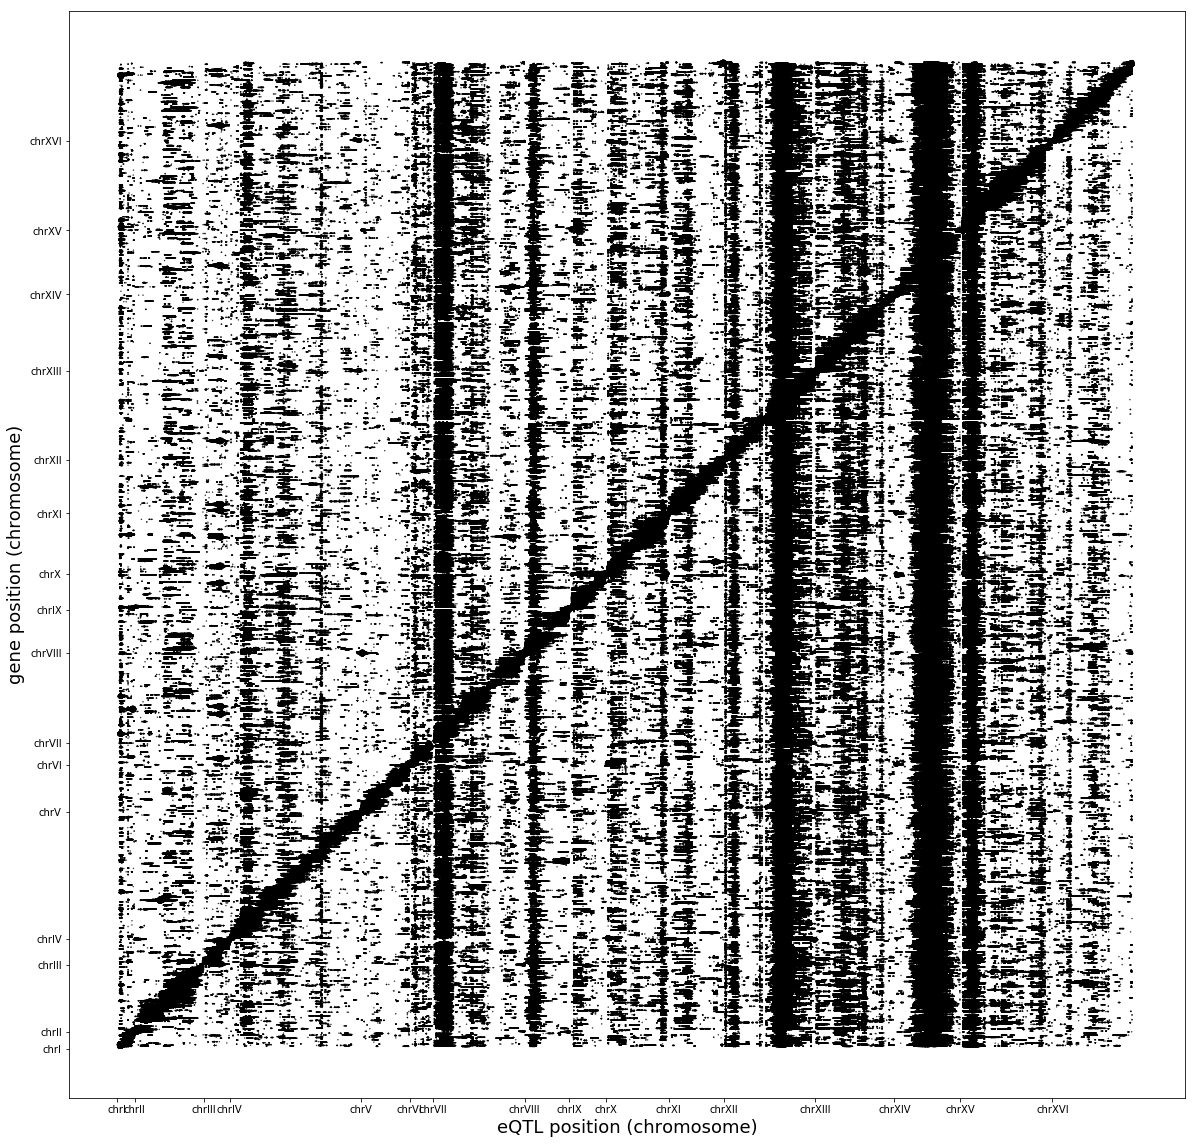

In [158]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('gene position (chromosome)', fontsize=18)

In [160]:
cpma_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/Simulation_0/CPMA/yeast_matrixeQTL_filtered_empiricalpvalues_topx_1.0_converted', sep='\t', index_col=0)

In [171]:
cpma_values

cpma    pvalue
snp                                   
chrI:107538_G/A    75.850434  0.997822
chrI:109735_A/G   660.626193  0.968592
chrI:112136_G/T   791.353317  0.958758
chrI:112549_G/A   733.325287  0.963258
chrI:114628_G/T   873.870592  0.951974
...                      ...       ...
chrXVI:97006_T/C  608.738918  0.972240
chrXVI:98320_T/C  538.922579  0.976904
chrXVI:98933_T/C  578.557514  0.974376
chrXVI:99253_C/G  564.074418  0.975336
chrXVI:99579_T/C  509.780484  0.978654

[11530 rows x 2 columns]

In [161]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpma_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [162]:
x_pos = []
y_pos = []
for snp, row in cpma_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

In [163]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA -log(pvalue)')

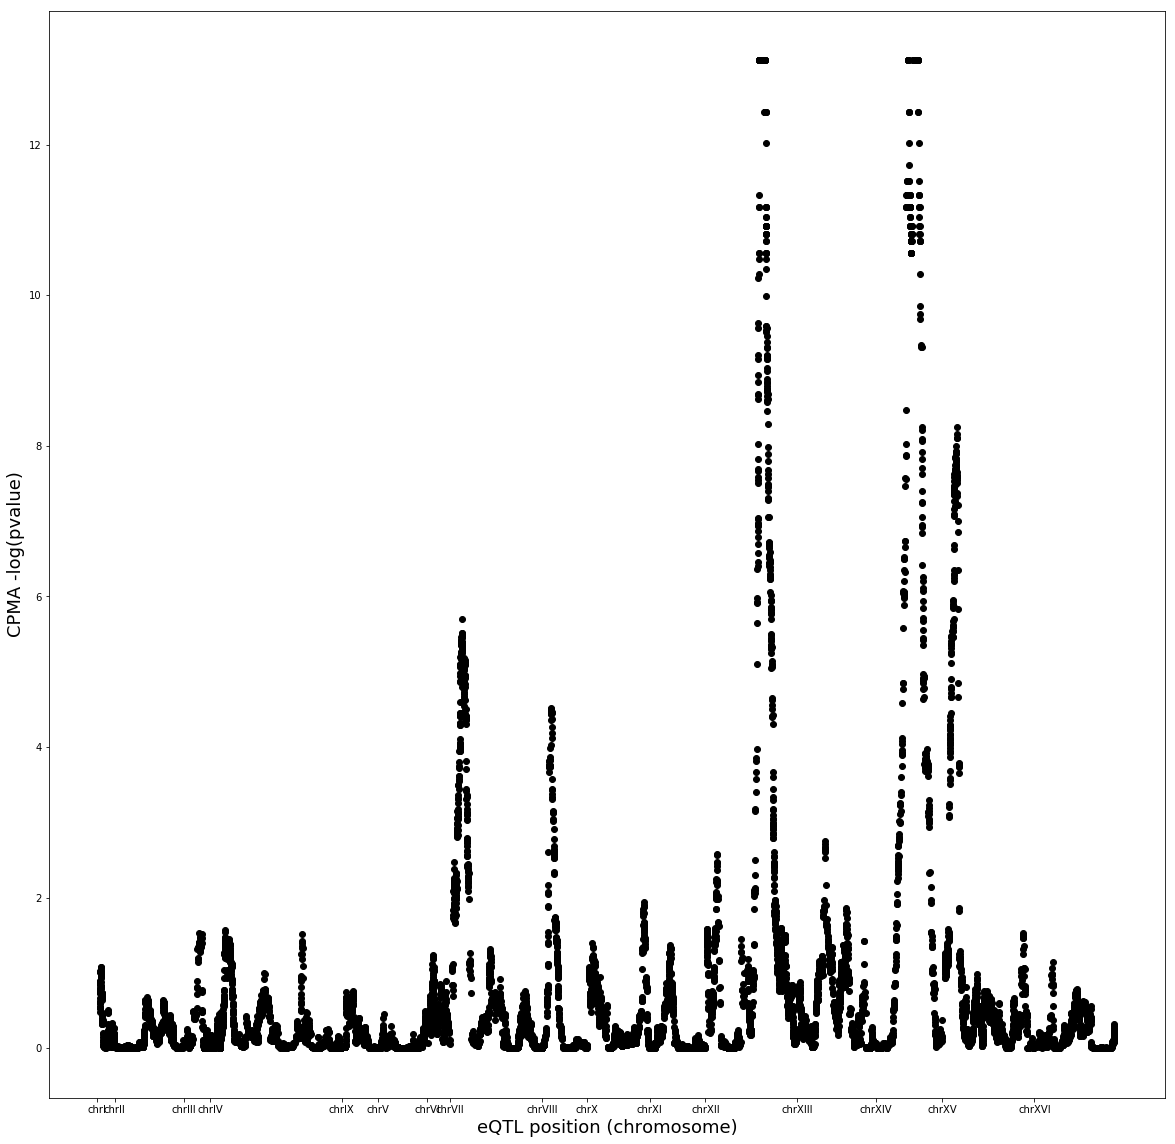

In [164]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA -log(pvalue)', fontsize=18)

In [165]:
cpmaPCs_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/Simulation_0/expressionPCs/yeast_matrixeQTL_filtered_PCs_cpmax_pvalues_1.0', sep='\t', index_col=0)

In [166]:
cpmaPCs_values

cpma    pvalue  adj_pvalue
snp                                             
chrI:107538_G/A   0.784806  0.375675    0.375675
chrI:109735_A/G   1.439939  0.230149    0.230149
chrI:112136_G/T   1.381104  0.239913    0.239913
chrI:112549_G/A   1.248145  0.263907    0.263907
chrI:114628_G/T   1.758600  0.184799    0.184799
...                    ...       ...         ...
chrXVI:97006_T/C  1.513340  0.218630    0.218630
chrXVI:98320_T/C  1.495424  0.221377    0.221377
chrXVI:98933_T/C  1.464018  0.226292    0.226292
chrXVI:99253_C/G  1.484356  0.223094    0.223094
chrXVI:99579_T/C  1.563616  0.211137    0.211137

[11530 rows x 3 columns]

In [167]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpmaPCs_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [168]:
x_pos = []
y_pos = []
for snp, row in cpmaPCs_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [169]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA expressionPCs -log(pvalue)')

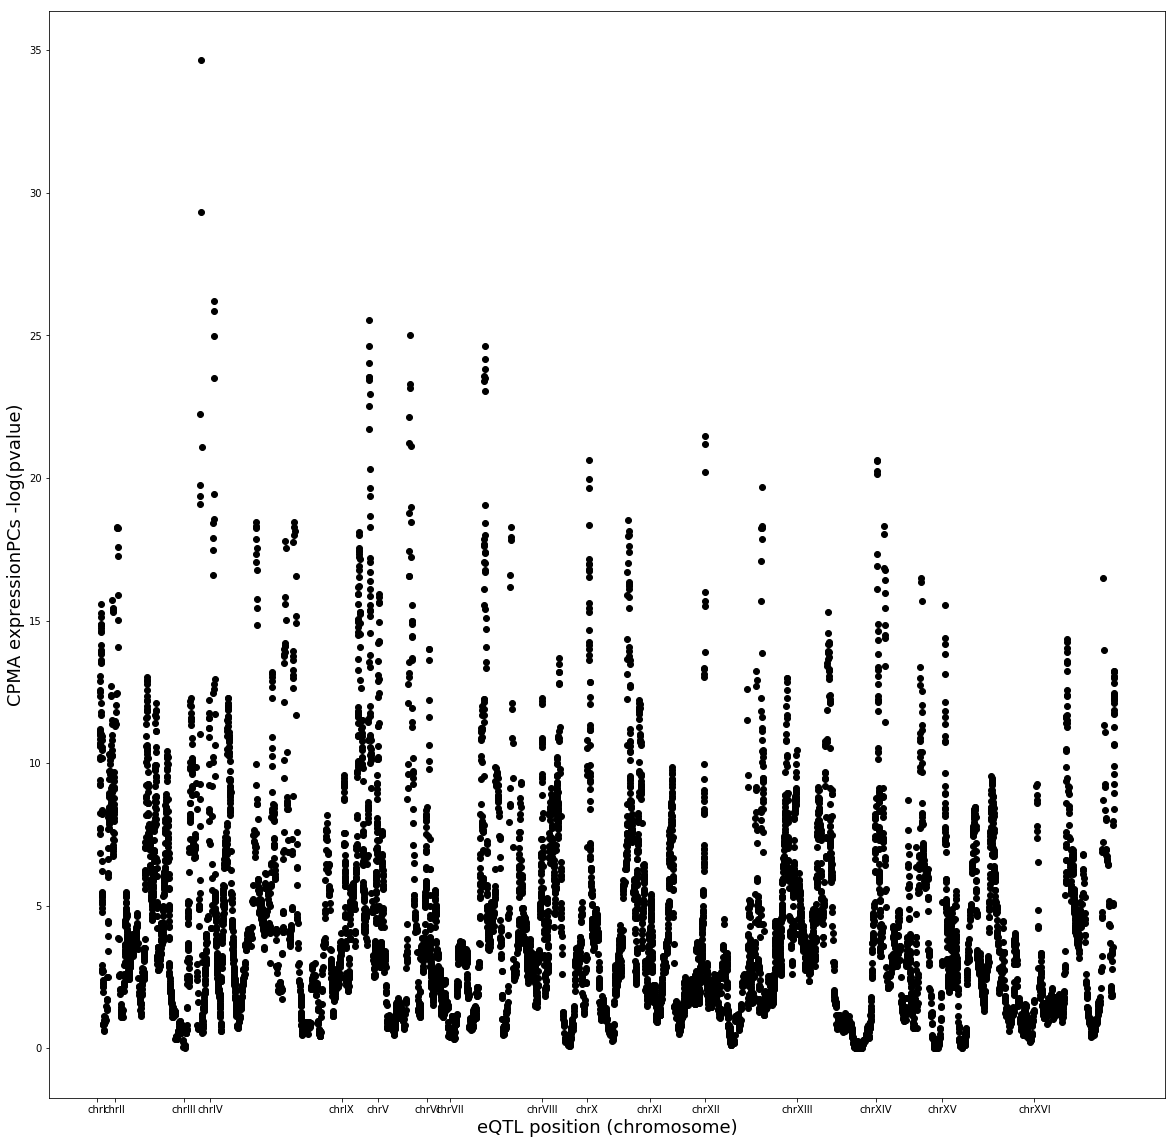

In [170]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA expressionPCs -log(pvalue)', fontsize=18)

In [177]:
PCs_pvals_adj = statsmodels.stats.multitest.multipletests(cpmaPCs_values['pvalue'], alpha=0.05, method='fdr_bh')
cpmaPCs_values.insert(loc=3, column='adj_pvals_fdr', value=PCs_pvals_adj[1])

In [178]:
cpmaPCs_values

cpma    pvalue  adj_pvalue  adj_pvals_fdr
snp                                                            
chrI:107538_G/A   0.784806  0.375675    0.375675       0.420211
chrI:109735_A/G   1.439939  0.230149    0.230149       0.285440
chrI:112136_G/T   1.381104  0.239913    0.239913       0.294277
chrI:112549_G/A   1.248145  0.263907    0.263907       0.316042
chrI:114628_G/T   1.758600  0.184799    0.184799       0.242984
...                    ...       ...         ...            ...
chrXVI:97006_T/C  1.513340  0.218630    0.218630       0.274747
chrXVI:98320_T/C  1.495424  0.221377    0.221377       0.277232
chrXVI:98933_T/C  1.464018  0.226292    0.226292       0.281796
chrXVI:99253_C/G  1.484356  0.223094    0.223094       0.278536
chrXVI:99579_T/C  1.563616  0.211137    0.211137       0.267811

[11530 rows x 4 columns]

In [179]:
x_pos = []
y_pos = []
for snp, row in cpmaPCs_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[3]))

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'CPMA expressionPCs -log(pvalue), adjusted for fdr')

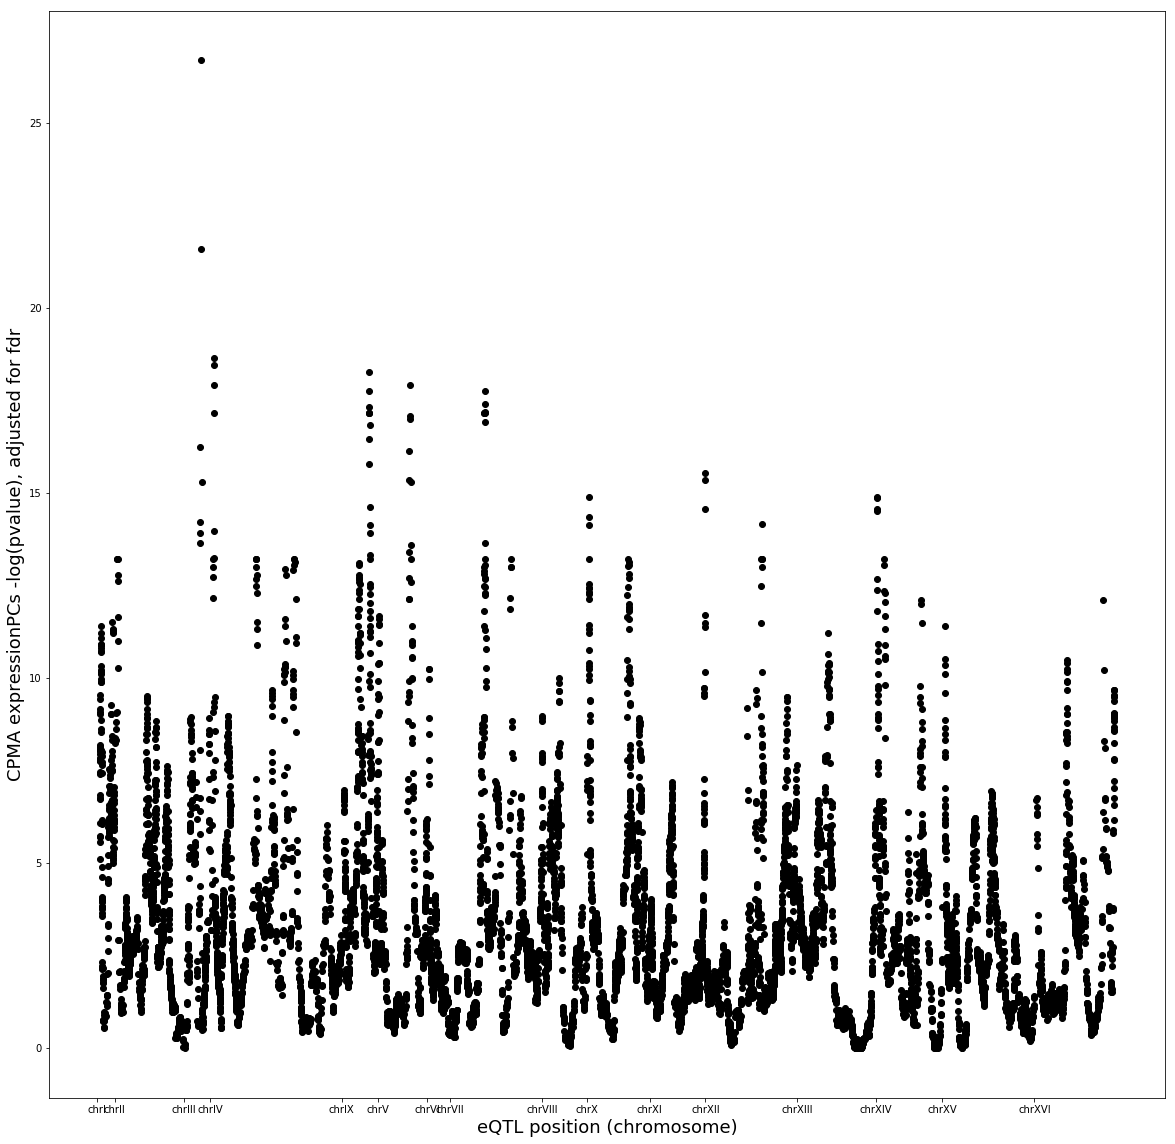

In [180]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA expressionPCs -log(pvalue), adjusted for fdr', fontsize=18)

In [181]:
cpmaPCs_peer_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/rerun_PEER/Simulation_0/expressionPCs/yeast_matrixeqtl_PCs_PEER_cpmax_pvalues_1.0', sep='\t', index_col=0)

In [182]:
cpmaPCs_peer_values

cpma    pvalue  adj_pvalue
snp                                             
chrI:107538_G/A   1.034475  0.309110    0.309110
chrI:109735_A/G   2.219979  0.136235    0.136235
chrI:112136_G/T   2.314759  0.128151    0.128151
chrI:112549_G/A   2.144164  0.143113    0.143113
chrI:114628_G/T   2.908727  0.088101    0.088101
...                    ...       ...         ...
chrXVI:97006_T/C  2.092086  0.148064    0.148064
chrXVI:98320_T/C  2.158223  0.141809    0.141809
chrXVI:98933_T/C  2.260176  0.132739    0.132739
chrXVI:99253_C/G  2.091913  0.148081    0.148081
chrXVI:99579_T/C  1.981789  0.159202    0.159202

[11530 rows x 3 columns]

In [183]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpmaPCs_peer_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [184]:
x_pos = []
y_pos = []
for snp, row in cpmaPCs_peer_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [185]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA expressionPCs -log(pvalue), PEER')

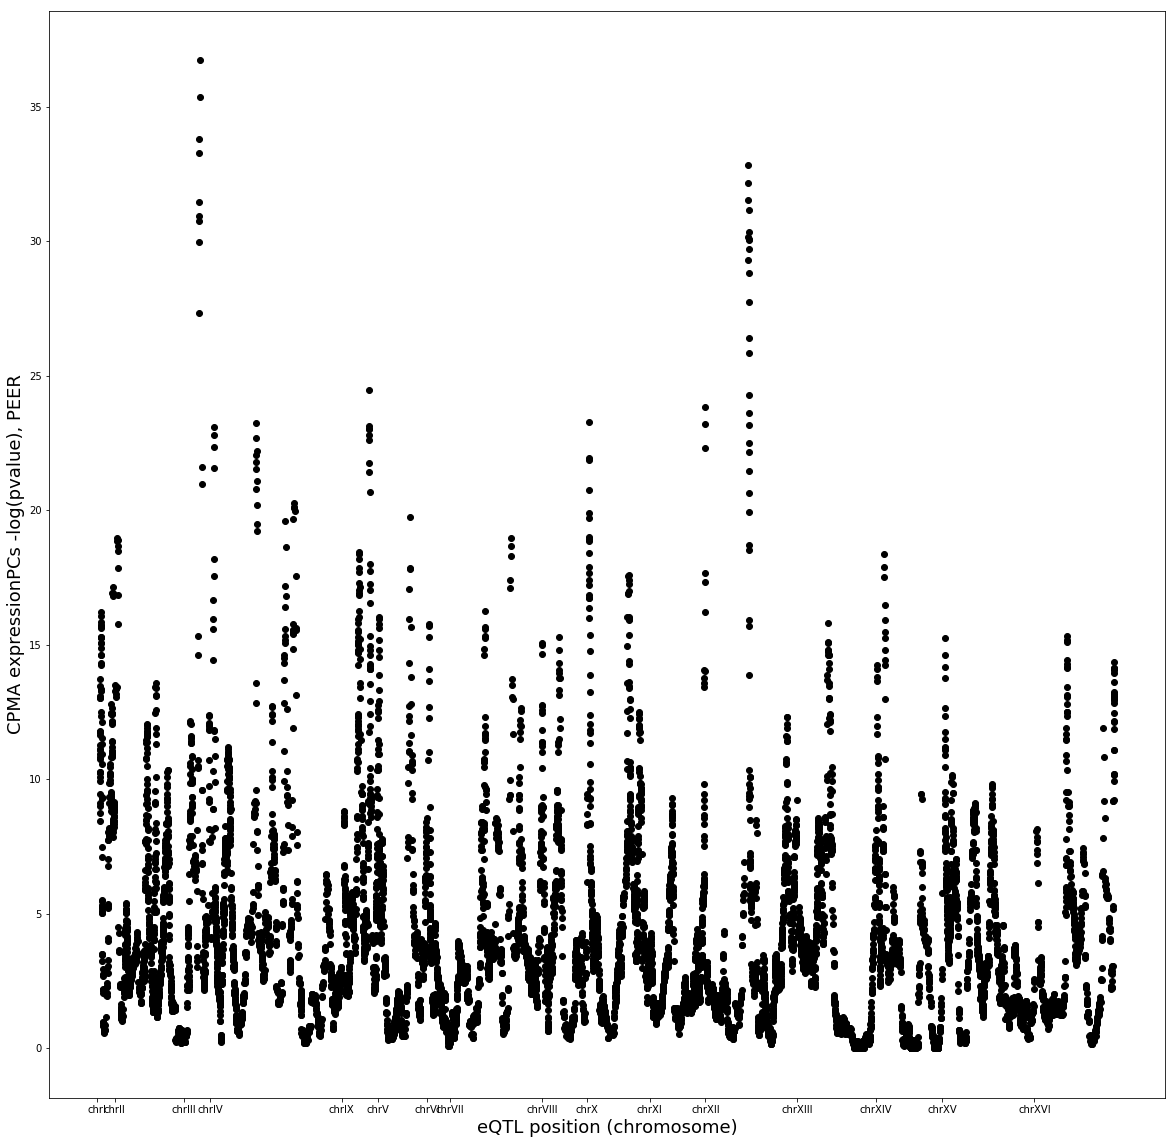

In [186]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA expressionPCs -log(pvalue), PEER', fontsize=18)

In [187]:
pvals_pcs_rerun = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/rerun_noPEER/expressionPCs/yeast_matrixeQTL_filtered_PCs_pvalue', sep='\t', index_col=0)

In [188]:
pvals_pcs_rerun

PC0       PC1      PC10     PC100    PC1000    PC1001  \
SNP                                                                            
chrI:107538_G/A   0.929294  0.694423  0.036884  0.046583  0.984285  0.511528   
chrI:109735_A/G   0.705764  0.224125  0.023067  0.096544  0.735695  0.398685   
chrI:112136_G/T   0.619864  0.179804  0.018842  0.117020  0.718848  0.503622   
chrI:112549_G/A   0.744140  0.198610  0.028157  0.086365  0.811748  0.535319   
chrI:114628_G/T   0.928536  0.167029  0.024266  0.150335  0.889463  0.448266   
...                    ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  0.243921  0.292019  0.549935  0.291912  0.684321  0.981556   
chrXVI:98320_T/C  0.256279  0.326044  0.591005  0.263358  0.690957  0.970583   
chrXVI:98933_T/C  0.260450  0.314934  0.640120  0.293994  0.659628  0.968786   
chrXVI:99253_C/G  0.235731  0.352688  0.657301  0.265326  0.595058  0.906800   
chrXVI:99579_T/C  0.257914  0.354471  0.626171  0.275444  0.495909  0.822030   

                    PC1002    PC1003    PC1004    PC1005  ...     PC990  \
SNP                                                       ...             
chrI:107538_G/A   0.313027  0.660441  0.919793  0.096456  ...  0.402723   
chrI:109735_A/G   0.187253  0.862159  0.847289  0.051174  ...  0.975711   
chrI:112136_G/T   0.215322  0.839048  0.817640  0.050838  ...  0.875082   
chrI:112549_G/A   0.240039  0.936591  0.645604  0.055498  ...  0.930082   
chrI:114628_G/T   0.439960  0.827631  0.815601  0.029819  ...  0.890036   
...                    ...       ...       ...       ...  ...       ...   
chrXVI:97006_T/C  0.566932  0.431663  0.607780  0.936150  ...  0.952659   
chrXVI:98320_T/C  0.455365  0.375738  0.593870  0.907072  ...  0.909080   
chrXVI:98933_T/C  0.510633  0.451581  0.581649  0.992134  ...  0.905986   
chrXVI:99253_C/G  0.546306  0.437494  0.568346  0.993292  ...  0.879130   
chrXVI:99579_T/C  0.597708  0.545986  0.539002  0.952095  ...  0.787788   

                     PC991     PC992     PC993     PC994     PC995     PC996  \
SNP                                                                            
chrI:107538_G/A   0.468158  0.195435  0.981673  0.764926  0.550052  0.649081   
chrI:109735_A/G   0.567310  0.175525  0.619352  0.339282  0.641289  0.986222   
chrI:112136_G/T   0.652075  0.204842  0.512334  0.292088  0.696957  0.956104   
chrI:112549_G/A   0.726672  0.133285  0.376261  0.273444  0.499435  0.973327   
chrI:114628_G/T   0.888172  0.091797  0.382555  0.232720  0.917579  0.980100   
...                    ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  0.601440  0.251053  0.367410  0.944176  0.719339  0.642783   
chrXVI:98320_T/C  0.582877  0.213115  0.285124  0.949453  0.816505  0.763378   
chrXVI:98933_T/C  0.596746  0.247031  0.305770  0.963781  0.823665  0.766705   
chrXVI:99253_C/G  0.549458  0.233727  0.313150  0.856235  0.933878  0.782745   
chrXVI:99579_T/C  0.612347  0.268218  0.367907  0.840377  0.920154  0.797878   

                     PC997     PC998     PC999  
SNP                                             
chrI:107538_G/A   0.716997  0.601794  0.444139  
chrI:109735_A/G   0.598890  0.992763  0.967338  
chrI:112136_G/T   0.567153  0.878075  0.953860  
chrI:112549_G/A   0.550679  0.926270  0.918712  
chrI:114628_G/T   0.799509  0.931952  0.719851  
...                    ...       ...       ...  
chrXVI:97006_T/C  0.262451  0.717983  0.830945  
chrXVI:98320_T/C  0.197015  0.640977  0.808854  
chrXVI:98933_T/C  0.186401  0.651099  0.772747  
chrXVI:99253_C/G  0.234038  0.644898  0.701860  
chrXVI:99579_T/C  0.241327  0.732012  0.764640  

[11530 rows x 1012 columns]

In [189]:
pval_flat = np.array(pvals_pcs_rerun).flatten()
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')
pvalues_adjusted = pvals_adj[1].reshape((11530, 1012))
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=pvals_pcs_rerun.columns, index=pvals_pcs_rerun.index)

In [190]:
pvalues_adj_df

PC0  PC1      PC10    PC100  PC1000  PC1001  PC1002  PC1003  \
SNP                                                                             
chrI:107538_G/A   1.0  1.0  0.883971  0.99102     1.0     1.0     1.0     1.0   
chrI:109735_A/G   1.0  1.0  0.688393  1.00000     1.0     1.0     1.0     1.0   
chrI:112136_G/T   1.0  1.0  0.612914  1.00000     1.0     1.0     1.0     1.0   
chrI:112549_G/A   1.0  1.0  0.767988  1.00000     1.0     1.0     1.0     1.0   
chrI:114628_G/T   1.0  1.0  0.708336  1.00000     1.0     1.0     1.0     1.0   
...               ...  ...       ...      ...     ...     ...     ...     ...   
chrXVI:97006_T/C  1.0  1.0  1.000000  1.00000     1.0     1.0     1.0     1.0   
chrXVI:98320_T/C  1.0  1.0  1.000000  1.00000     1.0     1.0     1.0     1.0   
chrXVI:98933_T/C  1.0  1.0  1.000000  1.00000     1.0     1.0     1.0     1.0   
chrXVI:99253_C/G  1.0  1.0  1.000000  1.00000     1.0     1.0     1.0     1.0   
chrXVI:99579_T/C  1.0  1.0  1.000000  1.00000     1.0     1.0     1.0     1.0   

                  PC1004    PC1005  ...  PC990  PC991  PC992  PC993  PC994  \
SNP                                 ...                                      
chrI:107538_G/A      1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrI:109735_A/G      1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrI:112136_G/T      1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrI:112549_G/A      1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrI:114628_G/T      1.0  0.791815  ...    1.0    1.0    1.0    1.0    1.0   
...                  ...       ...  ...    ...    ...    ...    ...    ...   
chrXVI:97006_T/C     1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrXVI:98320_T/C     1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrXVI:98933_T/C     1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrXVI:99253_C/G     1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   
chrXVI:99579_T/C     1.0  1.000000  ...    1.0    1.0    1.0    1.0    1.0   

                  PC995  PC996  PC997  PC998  PC999  
SNP                                                  
chrI:107538_G/A     1.0    1.0    1.0    1.0    1.0  
chrI:109735_A/G     1.0    1.0    1.0    1.0    1.0  
chrI:112136_G/T     1.0    1.0    1.0    1.0    1.0  
chrI:112549_G/A     1.0    1.0    1.0    1.0    1.0  
chrI:114628_G/T     1.0    1.0    1.0    1.0    1.0  
...                 ...    ...    ...    ...    ...  
chrXVI:97006_T/C    1.0    1.0    1.0    1.0    1.0  
chrXVI:98320_T/C    1.0    1.0    1.0    1.0    1.0  
chrXVI:98933_T/C    1.0    1.0    1.0    1.0    1.0  
chrXVI:99253_C/G    1.0    1.0    1.0    1.0    1.0  
chrXVI:99579_T/C    1.0    1.0    1.0    1.0    1.0  

[11530 rows x 1012 columns]

In [218]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)
    
# pc_labels_pos = []
pc_labels = []
for pc in pvalues_adj_df.columns:
    pc_num = int(pc.split('PC')[1])
    if pc_num % 20 == 0:
        pc_labels.append(pc_num)
pc_labels.append(1020)

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'PC number')

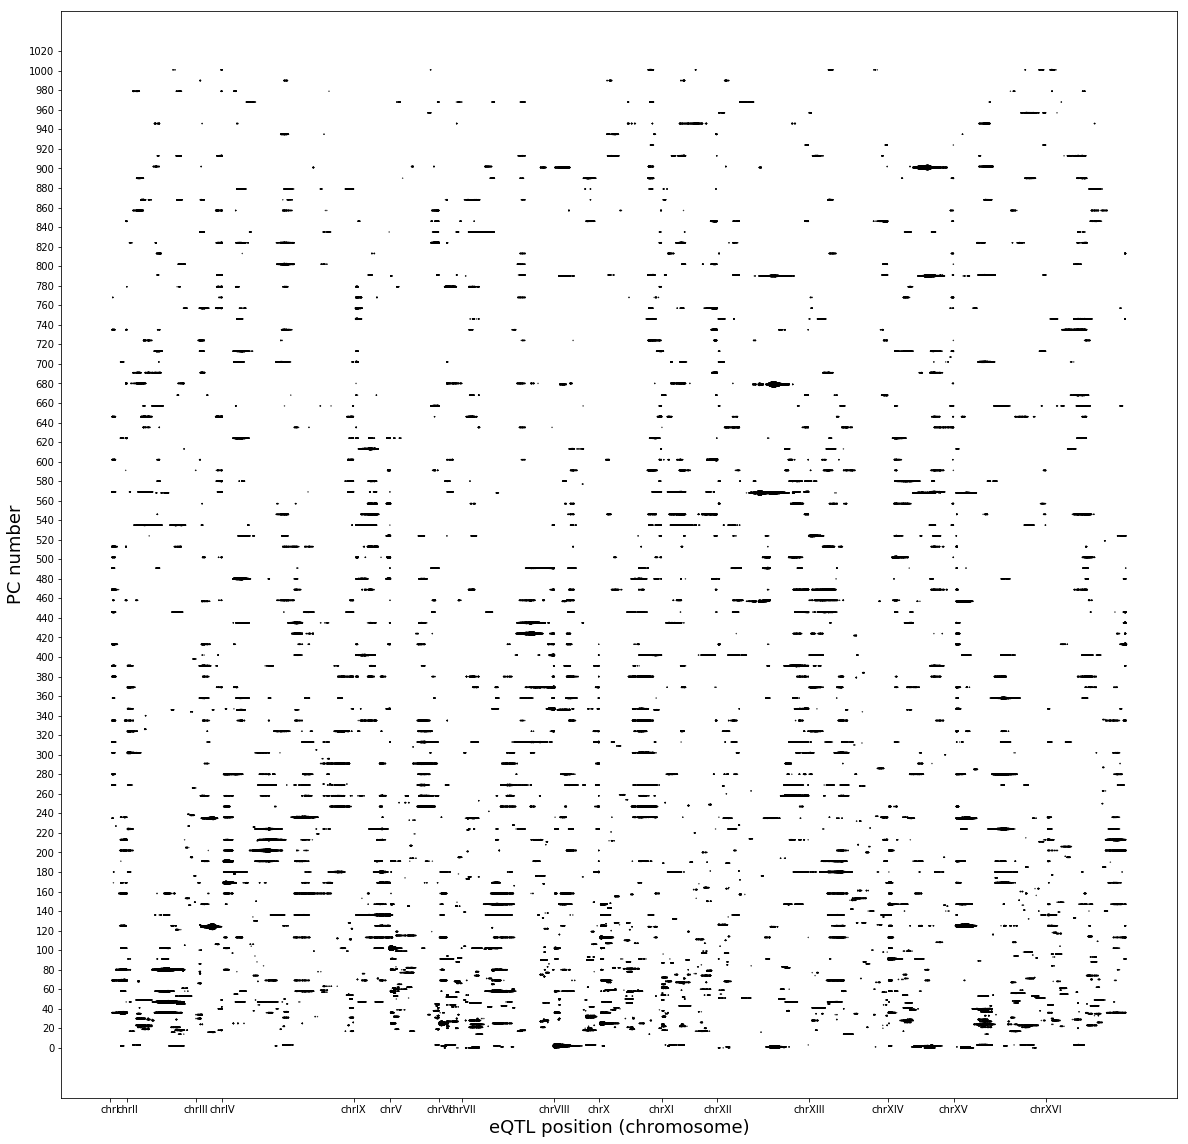

In [220]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(pcs)
    y_pos = []
    size = []
#     print(x_pos)
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('PC number', fontsize=18)

In [221]:
pvals_pcs_peer_rerun = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/rerun_PEER/Simulation_0/expressionPCs/yeast_matrixeqtl_PCs_PEER_pvalue', sep='\t', index_col=0)

In [222]:
pvals_pcs_peer_rerun

PC0       PC1      PC10     PC100    PC1000    PC1001  \
SNP                                                                            
chrI:107538_G/A   0.090283  0.000581  0.449754  0.901913  0.921328  0.036234   
chrI:109735_A/G   0.203040  0.000063  0.517587  0.252350  0.998523  0.324610   
chrI:112136_G/T   0.265949  0.000084  0.520893  0.266862  0.960113  0.359244   
chrI:112549_G/A   0.319427  0.000146  0.618303  0.258139  0.888357  0.493841   
chrI:114628_G/T   0.112037  0.000194  0.461724  0.082530  0.487619  0.503829   
...                    ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  0.949409  0.328343  0.623765  0.102289  0.986668  0.543052   
chrXVI:98320_T/C  0.935516  0.298800  0.628572  0.120402  0.856635  0.432508   
chrXVI:98933_T/C  0.981305  0.282752  0.623419  0.107361  0.965036  0.432571   
chrXVI:99253_C/G  0.944972  0.292537  0.621942  0.098193  0.958864  0.409732   
chrXVI:99579_T/C  0.975042  0.295200  0.626113  0.101101  0.872742  0.356223   

                    PC1002    PC1003    PC1004    PC1005  ...     PC990  \
SNP                                                       ...             
chrI:107538_G/A   0.222140  0.237687  0.898080  0.479340  ...  0.711470   
chrI:109735_A/G   0.163740  0.182285  0.705631  0.519692  ...  0.741944   
chrI:112136_G/T   0.184155  0.212158  0.936993  0.399927  ...  0.795135   
chrI:112549_G/A   0.127447  0.232849  0.973438  0.421983  ...  0.586651   
chrI:114628_G/T   0.143374  0.237346  0.960205  0.281322  ...  0.697762   
...                    ...       ...       ...       ...  ...       ...   
chrXVI:97006_T/C  0.433996  0.967067  0.310460  0.710583  ...  0.819624   
chrXVI:98320_T/C  0.516371  0.940064  0.287503  0.635468  ...  0.733797   
chrXVI:98933_T/C  0.516362  0.975610  0.310180  0.616334  ...  0.769946   
chrXVI:99253_C/G  0.550471  0.919769  0.281026  0.661100  ...  0.821053   
chrXVI:99579_T/C  0.481401  0.867937  0.287432  0.593827  ...  0.888543   

                     PC991     PC992     PC993     PC994     PC995     PC996  \
SNP                                                                            
chrI:107538_G/A   0.632366  0.719037  0.790067  0.336784  0.570154  0.198022   
chrI:109735_A/G   0.829514  0.505877  0.755062  0.261724  0.783854  0.949694   
chrI:112136_G/T   0.927761  0.593536  0.758843  0.277929  0.742073  0.940686   
chrI:112549_G/A   0.823844  0.571345  0.642520  0.322561  0.818240  0.902849   
chrI:114628_G/T   0.660575  0.772749  0.736048  0.269565  0.929734  0.987503   
...                    ...       ...       ...       ...       ...       ...   
chrXVI:97006_T/C  0.870900  0.645013  0.243934  0.676890  0.751791  0.741312   
chrXVI:98320_T/C  0.749485  0.633770  0.191319  0.631992  0.652332  0.811411   
chrXVI:98933_T/C  0.728571  0.649641  0.187188  0.609492  0.633383  0.841476   
chrXVI:99253_C/G  0.787298  0.635834  0.212997  0.678495  0.581193  0.797708   
chrXVI:99579_T/C  0.867877  0.673066  0.228347  0.651492  0.584896  0.731175   

                     PC997     PC998     PC999  
SNP                                             
chrI:107538_G/A   0.417441  0.717219  0.461415  
chrI:109735_A/G   0.533174  0.500066  0.423089  
chrI:112136_G/T   0.647553  0.503860  0.398540  
chrI:112549_G/A   0.630954  0.512619  0.365216  
chrI:114628_G/T   0.492796  0.727285  0.614616  
...                    ...       ...       ...  
chrXVI:97006_T/C  0.662347  0.774965  0.702706  
chrXVI:98320_T/C  0.726593  0.714524  0.694129  
chrXVI:98933_T/C  0.718448  0.791749  0.716116  
chrXVI:99253_C/G  0.671031  0.766020  0.761763  
chrXVI:99579_T/C  0.568037  0.889494  0.772500  

[11530 rows x 1012 columns]

In [223]:
pval_flat = np.array(pvals_pcs_peer_rerun).flatten()
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')
pvalues_adjusted = pvals_adj[1].reshape((11530, 1012))
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=pvals_pcs_peer_rerun.columns, index=pvals_pcs_peer_rerun.index)

In [224]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)
    
# pc_labels_pos = []
pc_labels = []
for pc in pvalues_adj_df.columns:
    pc_num = int(pc.split('PC')[1])
    if pc_num % 20 == 0:
        pc_labels.append(pc_num)
pc_labels.append(1020)

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'PC number, PEER')

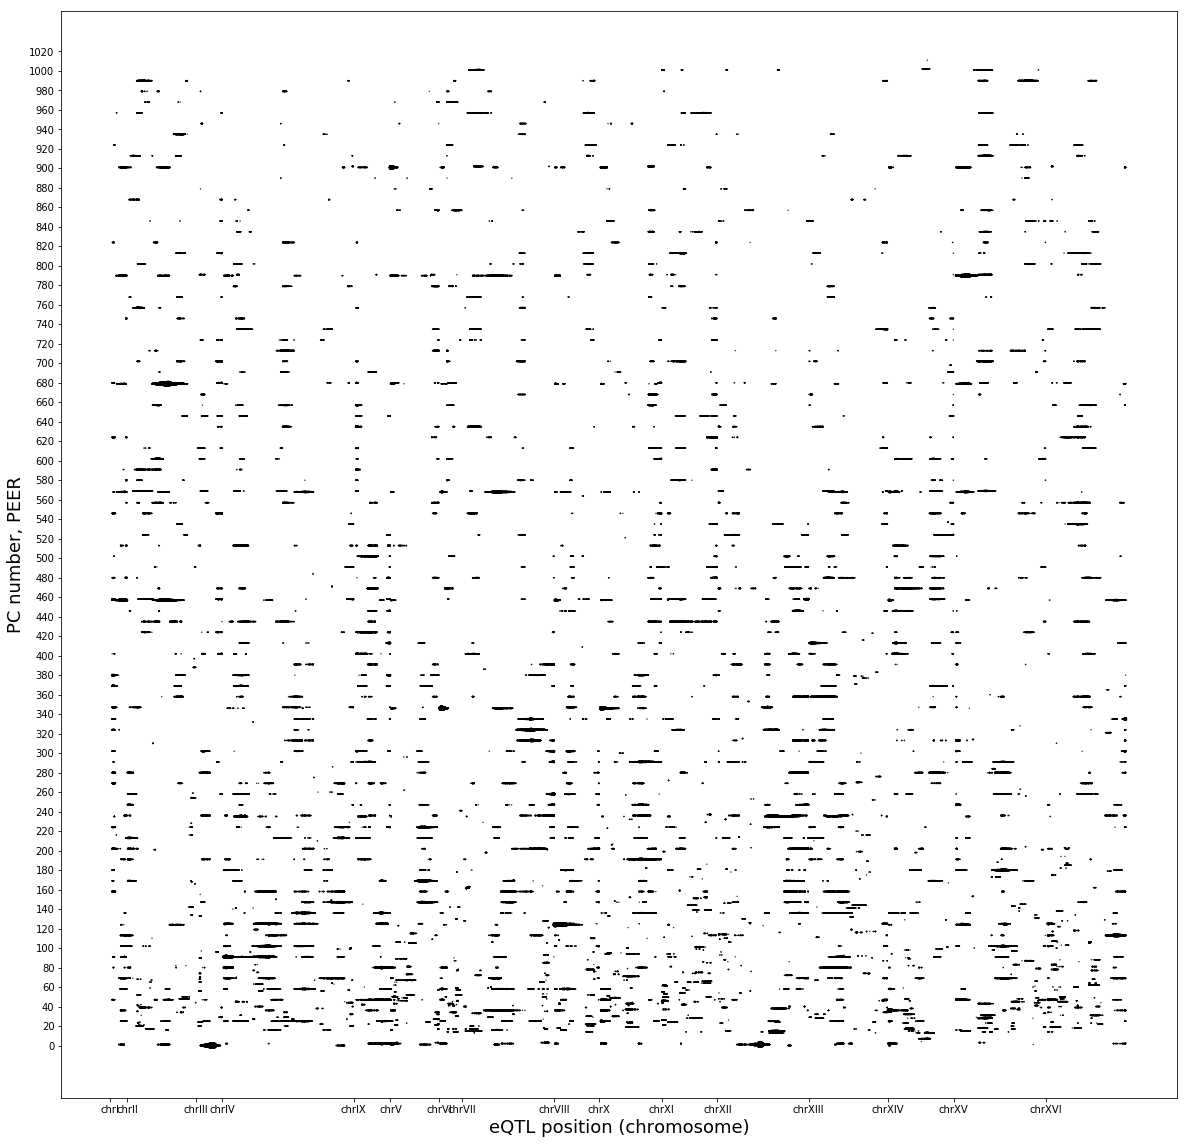

In [226]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(pcs)
    y_pos = []
    size = []
#     print(x_pos)
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('PC number, PEER', fontsize=18)

In [227]:
cpma_peer_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/rerun_PEER/Simulation_0/CPMA/yeast_matrixeqtl_PEER_empiricalpvalues_topx_1.0_converted', sep='\t', index_col=0)

In [228]:
cpma_peer_values

cpma    pvalue
snp                                    
chrI:107538_G/A   3316.916453  0.885572
chrI:109735_A/G   3777.499926  0.833376
chrI:112136_G/T   3817.887959  0.828584
chrI:112549_G/A   3797.106226  0.831052
chrI:114628_G/T   3941.680485  0.813226
...                       ...       ...
chrXVI:97006_T/C  2288.168373  0.965924
chrXVI:98320_T/C  2249.761761  0.967916
chrXVI:98933_T/C  2304.374601  0.965110
chrXVI:99253_C/G  2233.007920  0.968796
chrXVI:99579_T/C  2244.245908  0.968204

[11530 rows x 2 columns]

In [229]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpma_peer_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [230]:
x_pos = []
y_pos = []
for snp, row in cpma_peer_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

In [231]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA -log(pvalue), PEER')

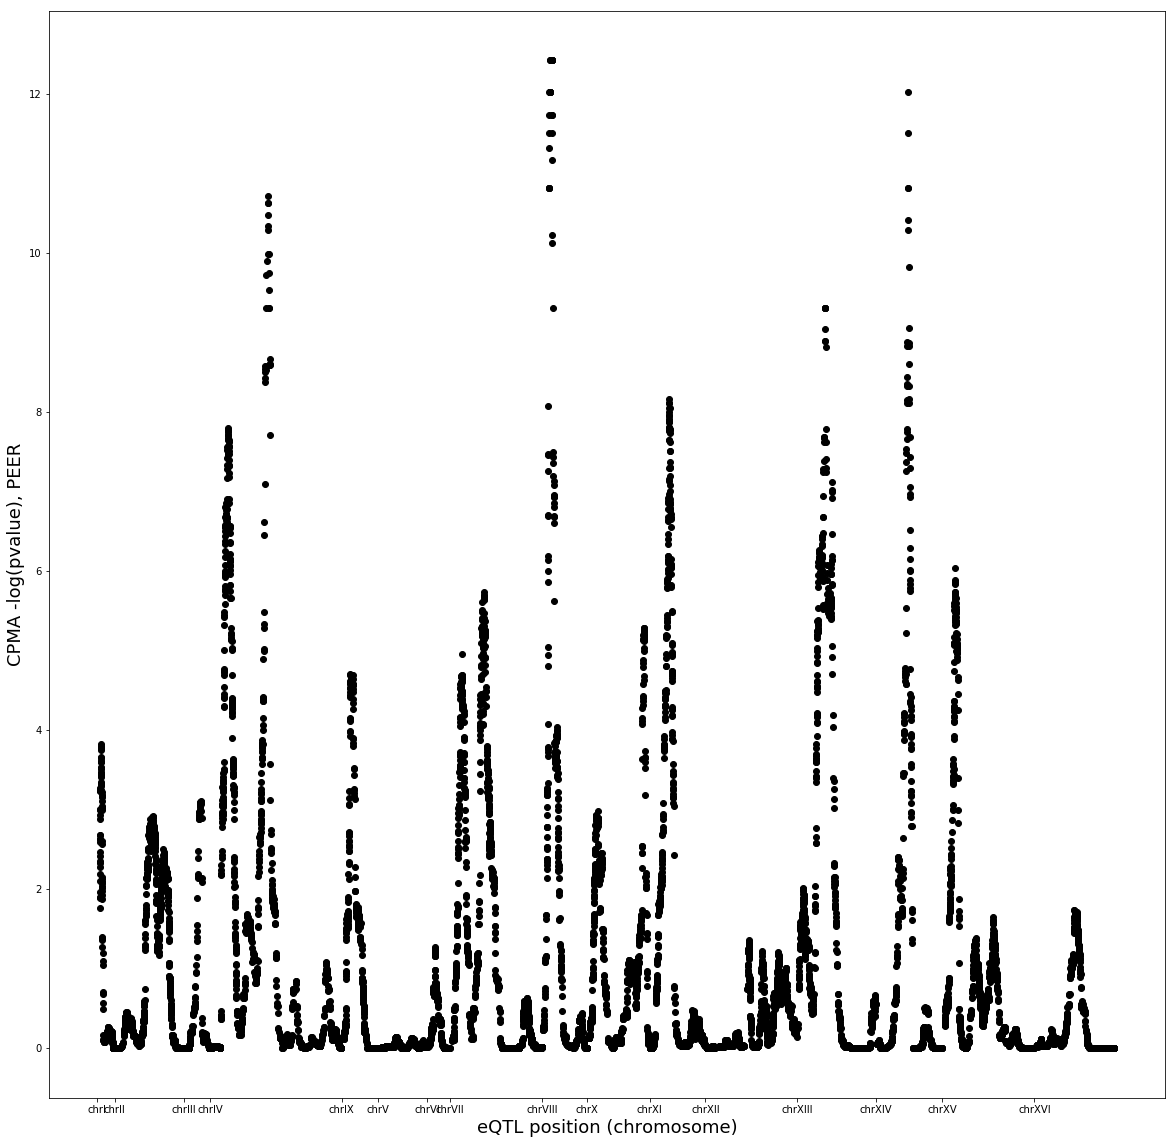

In [232]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA -log(pvalue), PEER', fontsize=18)